<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">


# DSI-SG-42 Project 4:
## In A Heartbeat: Prediction of Heart Disease Risk for Early Detection

---

## 2A. Exploratory Data Analysis - Data Visualization

In this series of notebooks, we are breaking down the Exploratory Data Analysis process into several steps.
  
This notebook will analyse the data collected after all null values are dropped through visualisations.  
  
The next notebook [2B. Exploratory Data Analysis - Analysis on Missing Values](02B_EDA_MissingValues.ipynb) will perform an analysis of missing values and impute them accordingly.
  
In the final notebook [2C. Exploratory Data Analysis - Before and After Imputation](02C_EDA_Before_and_After_Imputation.ipynb), we will compare how the distribution changes before and after imputation of null values.

In [1]:
# import libraries
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns

# Set theme of visualizations to ggplot
plt.style.use('ggplot')


# setting displays
%matplotlib inline
pd.set_option('display.width', 100000)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# import dataset
df = pd.read_csv('../data/filtered_data.csv')


print(df.head()) # inspect dataset

    age  height  weight    bmi  yrssmok  packday  sleep_hours  health_status  phys_health_not_good  mental_health_not_good  last_routine_checkup  visit_dentist_past_year  health_insurance  phy_exercise_past_30_days  stroke  cancer  kidney_disease  colon_sigmoidoscopy  chd_mi  asthma_status  race_ethnicity  sex  education  income  smoker_status  e_cig_smoker  binge_drinker  heavy_drinker
0  80.0     NaN     NaN    NaN      0.0      0.0          8.0            2.0                   1.0                     1.0                   1.0                      9.0               9.0                        2.0     2.0     2.0             2.0                  1.0     2.0            3.0             1.0  2.0        4.0    99.0            4.0           1.0            1.0            1.0
1  80.0    1.60   68.04  26.58      0.0      0.0          6.0            1.0                   1.0                     1.0                   8.0                      9.0               1.0                        2.0     2

### 2A.1 Cleaning of Categorical Values



In [2]:
# define income groups
income_intervals = {
    '<50K': [1.0, 2.0, 3.0, 4.0, 5.0, 6.0],
    '50K-100K': [7.0, 8.0],
    '100K-150K': [9.0],
    '150K-200K': [10.0],
    '>200K': [11.0],
    'unknown': [np.nan]
}

# create an empty list
income_groups = []

# iterate over the 'income3' column
for row in df['income']:
    assigned_group = None
    # Check if the value falls into any of the defined intervals
    for group, values in income_intervals.items():
        if row in values:
            assigned_group = group
            break  # Exit the loop if a match is found
    # If no match is found, assign NaN
    if assigned_group is None:
        assigned_group = np.nan
    # Append the assigned group to the list
    income_groups.append(assigned_group)

# Assign the list of income groups to the 'income_groups' column
df['income_groups'] = income_groups
df = df.drop(columns=['income'])


# Inspect the df
print(df.head())


    age  height  weight    bmi  yrssmok  packday  sleep_hours  health_status  phys_health_not_good  mental_health_not_good  last_routine_checkup  visit_dentist_past_year  health_insurance  phy_exercise_past_30_days  stroke  cancer  kidney_disease  colon_sigmoidoscopy  chd_mi  asthma_status  race_ethnicity  sex  education  smoker_status  e_cig_smoker  binge_drinker  heavy_drinker income_groups
0  80.0     NaN     NaN    NaN      0.0      0.0          8.0            2.0                   1.0                     1.0                   1.0                      9.0               9.0                        2.0     2.0     2.0             2.0                  1.0     2.0            3.0             1.0  2.0        4.0            4.0           1.0            1.0            1.0           NaN
1  80.0    1.60   68.04  26.58      0.0      0.0          6.0            1.0                   1.0                     1.0                   8.0                      9.0               1.0                     

In [3]:
print(df.isna().sum()) # inspect for null values in each variable

age                              0
height                       28652
weight                       42078
bmi                          46568
yrssmok                      38021
packday                      38218
sleep_hours                      3
health_status                    3
phys_health_not_good             0
mental_health_not_good           0
last_routine_checkup             3
visit_dentist_past_year          4
health_insurance                 0
phy_exercise_past_30_days        0
stroke                           2
cancer                           3
kidney_disease                   2
colon_sigmoidoscopy          19067
chd_mi                        5021
asthma_status                    0
race_ethnicity                   2
sex                              0
education                        0
smoker_status                    0
e_cig_smoker                     0
binge_drinker                    0
heavy_drinker                    0
income_groups                96047
dtype: int64


In [4]:
# Reordering the dataframe

# subset variables that are numerical
df_numeric = df[['age', 'height', 'weight', 'bmi', 'yrssmok','packday', 'sleep_hours']]

# Filter the DataFrame to include only non-numeric columns
df_cat = df.drop(columns = ['age', 'height', 'weight', 'bmi', 'yrssmok','packday',  'sleep_hours'])

In [5]:
# convert categorical from original dtype of float to object
def to_string(dataframe, col):
    dataframe[col] = dataframe[col].astype(str) # convert to string
    return dataframe

# for loop to convert dtype to string
for col in df_cat.columns:
    df_cat = to_string(df_cat,col)

print(df_cat.info()) # debug

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 445132 entries, 0 to 445131
Data columns (total 21 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   health_status              445132 non-null  object
 1   phys_health_not_good       445132 non-null  object
 2   mental_health_not_good     445132 non-null  object
 3   last_routine_checkup       445132 non-null  object
 4   visit_dentist_past_year    445132 non-null  object
 5   health_insurance           445132 non-null  object
 6   phy_exercise_past_30_days  445132 non-null  object
 7   stroke                     445132 non-null  object
 8   cancer                     445132 non-null  object
 9   kidney_disease             445132 non-null  object
 10  colon_sigmoidoscopy        445132 non-null  object
 11  chd_mi                     445132 non-null  object
 12  asthma_status              445132 non-null  object
 13  race_ethnicity             445132 non-null  

In [6]:
# combining the numeric and categorical dataframes
combined_df = pd.concat([df_numeric, df_cat], axis=1)

print(combined_df.info()) # check for order

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 445132 entries, 0 to 445131
Data columns (total 28 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   age                        445132 non-null  float64
 1   height                     416480 non-null  float64
 2   weight                     403054 non-null  float64
 3   bmi                        398564 non-null  float64
 4   yrssmok                    407111 non-null  float64
 5   packday                    406914 non-null  float64
 6   sleep_hours                445129 non-null  float64
 7   health_status              445132 non-null  object 
 8   phys_health_not_good       445132 non-null  object 
 9   mental_health_not_good     445132 non-null  object 
 10  last_routine_checkup       445132 non-null  object 
 11  visit_dentist_past_year    445132 non-null  object 
 12  health_insurance           445132 non-null  object 
 13  phy_exercise_past_30_days  44

In [7]:
# dictionary to map informational data into the values rather than a numeric number that represents what it means

column_changes = {

'health_status': {'1.0':'Excellent', '2.0':'Very Good', '3.0':'Good', '4.0':'Fair', '5.0':'Poor', '7.0':np.nan, '9.0': np.nan, np.nan: np.nan},
'phys_health_not_good': {'1.0':'0 days', '2.0':'1-13 days', '3.0':'>14 days', '9.0':np.nan},
'mental_health_not_good': {'1.0':'0 days', '2.0':'1-13 days', '3.0':'>14 days', '9.0':np.nan},
'last_routine_checkup': {'1.0':'Within past year', '2.0':'Within past 2 years', '3.0':'Within past 5 years', '4.0':'>5 years ago',
                         '7.0':np.nan, '8.0':'Never', '9.0':np.nan, np.nan: np.nan},
'visit_dentist_past_year': {'1.0':'Yes', '2.0':'No', '9.0':np.nan, np.nan: np.nan},
'health_insurance': {'1.0':'Yes', '2.0':'No', '9.0': np.nan},
'phy_exercise_past_30_days': {'1.0':'Yes', '2.0':'No', '9.0':np.nan},
'stroke': {'1.0':'Yes', '2.0':'No', '7.0': np.nan, '9.0': np.nan},
'cancer': {'1.0':'Yes', '2.0':'No', '7.0': np.nan, '9.0': np.nan},
'kidney_disease': {'1.0':'Yes', '2.0':'No', '7.0':np.nan  , '9.0': np.nan},
'colon_sigmoidoscopy': {'1.0':'Yes', '2.0':'No', '7.0': np.nan,'999.0': 'age <45', np.nan: np.nan},
'chd_mi': {'1.0': 'Yes', '2.0': 'No', np.nan: np.nan},
'asthma_status': {'1.0':'Current', '2.0':'Former', '3.0':'Never', '9.0': np.nan},
'race_ethnicity': {'1.0':'White', '2.0':'Black', '3.0':'American Indian/ Alaskan Native', '4.0': 'Asian', '5.0': 'Native Hawaiian/ Pacific Islander',
                   '7.0':'Multiracial', '8.0':'Hispanic', '9.0': np.nan, np.nan: np.nan},
'sex': {'1.0': 'Male', '2.0':'Female'},
'education': {'1.0':'Did not grad High Sch', '2.0': 'Grad High Sch', '3.0': 'Attended College or Tech Sch', '4.0': 'Grad College or Tech Sch', '9.0': np.nan},
'smoker_status': {'1.0':'Current smoker - every day', '2.0': 'Current smoker - some days', '3.0': 'Former smoker', '4.0': 'Never smoked', '9.0': np.nan},
'e_cig_smoker': {'1.0':'No', '2.0':'Yes', '9.0': np.nan},
'binge_drinker': {'1.0':'No', '2.0':'Yes', '9.0': np.nan},
'heavy_drinker': {'1.0':'No', '2.0':'Yes', '9.0': np.nan},
'income_groups': {'<50K': '<50K', '50K-100K': '50K-100K', '100K-150K': '100K-150K', '150K-200K': '150K-200K', '>200K': '>200K', 'nan': np.nan}
}



In [8]:
# to map the new values into a new dataframe

df_updated = combined_df.copy() # create a copy of df

# for-loop to map the changes
for column, mapping in column_changes.items():
    if column in df_updated.columns:
        df_updated[column] = df_updated[column].map(mapping)
    else:
        print(f"{column} is not in the DataFrame") # as a catch all if a column is not mapped

print(df_updated.head()) # debug

    age  height  weight    bmi  yrssmok  packday  sleep_hours health_status phys_health_not_good mental_health_not_good last_routine_checkup visit_dentist_past_year health_insurance phy_exercise_past_30_days stroke cancer kidney_disease colon_sigmoidoscopy chd_mi asthma_status race_ethnicity     sex                     education               smoker_status e_cig_smoker binge_drinker heavy_drinker income_groups
0  80.0     NaN     NaN    NaN      0.0      0.0          8.0     Very Good               0 days                 0 days     Within past year                     NaN              NaN                        No     No     No             No                 Yes     No         Never          White  Female      Grad College or Tech Sch                Never smoked           No            No            No           NaN
1  80.0    1.60   68.04  26.58      0.0      0.0          6.0     Excellent               0 days                 0 days                Never                     NaN        

In [9]:
# replace numerical data that are not informational to nan values

# 77: Don't know/ Not sure, 99: Refused
df_updated['sleep_hours'] = df_updated['sleep_hours'].replace((77.0, 99.0), np.nan)


#### 2A.1.1 Drop all null values in a dataframe.

In this code block, `heart_df_dropall` will be assigned as a dataframe that has all null values dropped without impunity to see how the distribution would be like before the null values will be imputed on another dataframe.

In [10]:
# drop all null values
heart_df_dropall = df_updated.dropna()

heart_df_dropall.to_csv('../data/heart_drop_null_data.csv', index=False)

print(f'''

There is a total of {df_updated.shape[0]} in the dataframe, after dropping the null values,
there are {heart_df_dropall.shape[0]} left.

A total of {df_updated.shape[0] - heart_df_dropall.shape[0]} has been dropped.


''')




There is a total of 445132 in the dataframe, after dropping the null values,
there are 272664 left.

A total of 172468 has been dropped.





### 2A.2 Demographics

We want to see the distribution of the ethinicity, gender, age, education, income, and health insurance of the respondents in this survey.

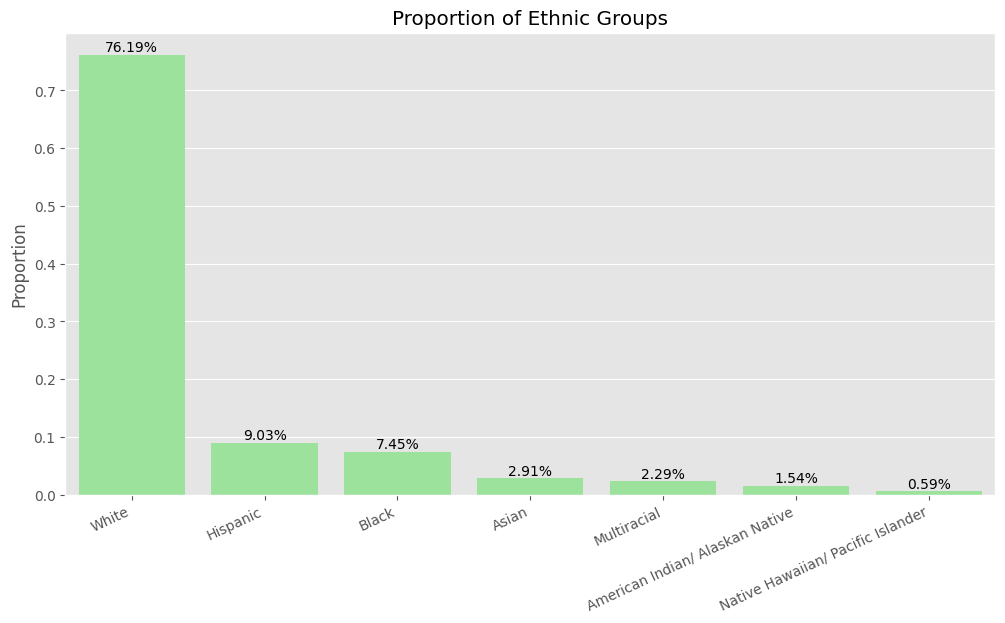

'

In this sample:
- 76.19%% of the population identified as Whites
- 9.03%% identified as Hispanics
- 7.45%% idenfified as Blacks
- 2.91%% identified as Asians
- 2.29%% are of mixed race
- 1.54%% are American Indian
- 0.59%% are Native Hawaiians

      


In [11]:
race_norm = heart_df_dropall['race_ethnicity'].value_counts(normalize=True)

# set figure size
plt.figure(figsize=(12,6))

# plot normalized race plot
race_norm_plot = sns.barplot(x = race_norm.index, y = race_norm.values, color = 'lightgreen')


# add plot info
plt.title('Proportion of Ethnic Groups')
plt.xlabel('')
plt.ylabel('Proportion')
plt.xticks(range(len(race_norm.index)))
plt.xticks(race_norm.index, rotation=25, ha='right')

# Annotate bar values
for bar in race_norm_plot.patches:
    plt.annotate(format(bar.get_height(), '.2%'),
                     (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                     ha='center', va='bottom')

plt.show()

print(f''''

In this sample:
- {race_norm.iloc[0]:.2%}% of the population identified as Whites
- {race_norm.iloc[1]:.2%}% identified as Hispanics
- {race_norm.iloc[2]:.2%}% idenfified as Blacks
- {race_norm.iloc[3]:.2%}% identified as Asians
- {race_norm.iloc[4]:.2%}% are of mixed race
- {race_norm.iloc[5]:.2%}% are American Indian
- {race_norm.iloc[6]:.2%}% are Native Hawaiians

      ''')

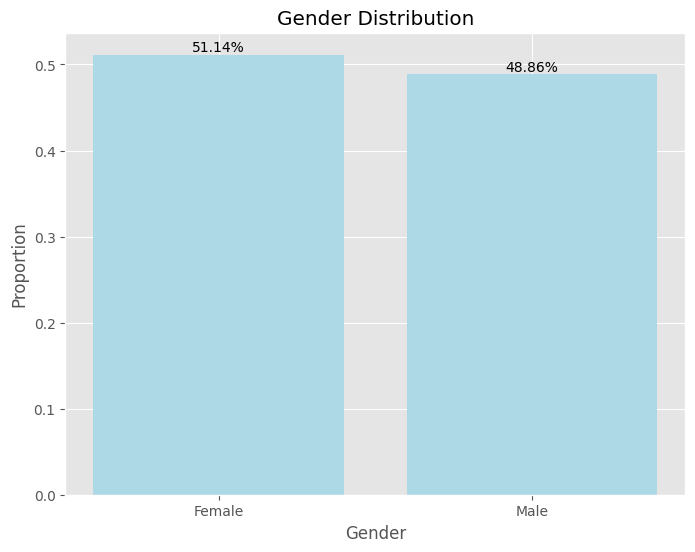



In this survey, 51.14% are females and are 48.86% males.

As there is a small difference of 2.27% more females than males in this sample, we can consider this difference to be balanced.



In [12]:
# Gender distribution
sex = heart_df_dropall['sex'].value_counts(normalize=True)

# set figure size
plt.figure(figsize=(8,6))

# plot barplot
sex_plot = plt.bar(sex.index, sex.values, color = 'lightblue')

# add plot info
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Proportion')

# Annotate bar values
for bar in sex_plot.patches:
    plt.annotate(format(bar.get_height(), '.2%'),
                     (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                     ha='center', va='bottom')

plt.show()

difference = sex.iloc[0] - sex.iloc[1]

print(f'''

In this survey, {sex.iloc[0]:.2%} are females and are {sex.iloc[1]:.2%} males.

As there is a small difference of {difference:.2%} more females than males in this sample, we can consider this difference to be balanced.
''')

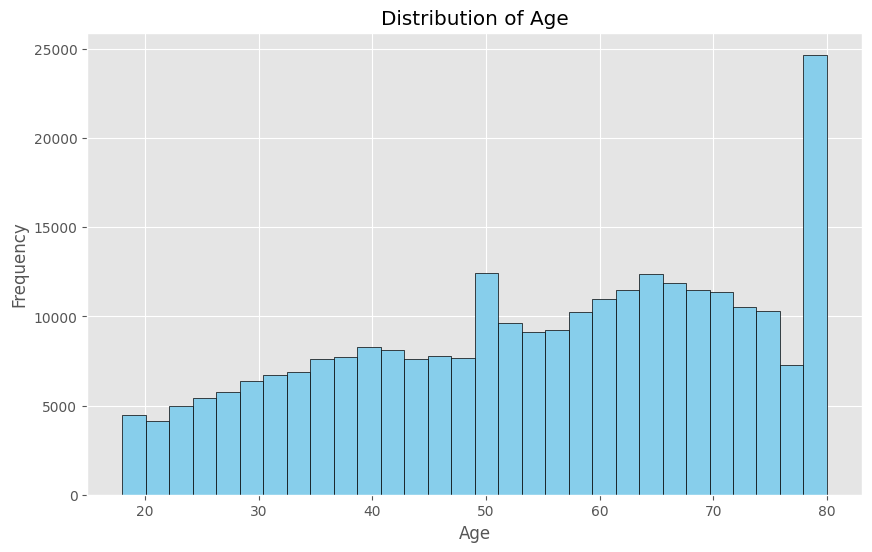



The distribution of age for this sample is roughly bell shaped. There are 2 age groups that has higher frequency than the peaks.
Age groups of 80 and above formed the largest group. This is likely due to the aggregation of the survey as that bin categorizes
all respondents age 80 and above instead of intervals of 5 years.





In [13]:
# Histogram for 'age'
plt.figure(figsize=(10, 6))

# plot histogram
plt.hist(heart_df_dropall['age'], bins=30, color='skyblue', edgecolor='black')

# set plot information
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)


plt.show()

print('''

The distribution of age for this sample is roughly bell shaped. There are 2 age groups that has higher frequency than the peaks.
Age groups of 80 and above formed the largest group. This is likely due to the aggregation of the survey as that bin categorizes
all respondents age 80 and above instead of intervals of 5 years.


''')

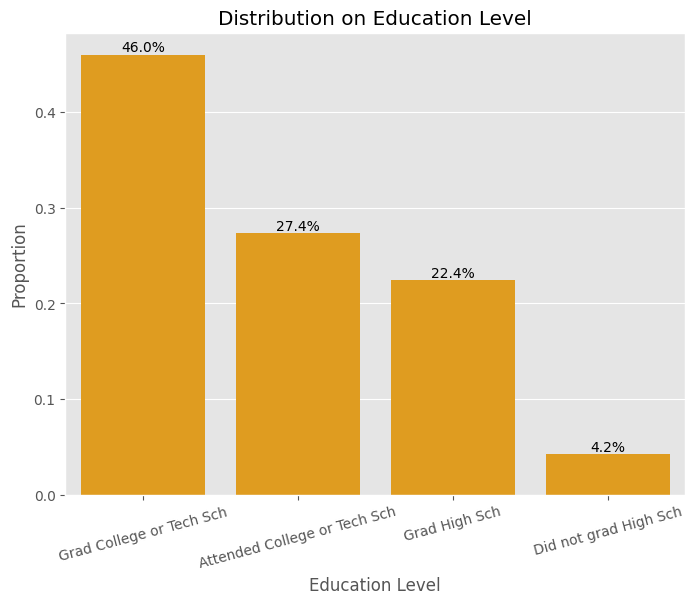


The graph shows that most respondents have graduated from Graduate College or Tech School
- 0 respondents possess certification from Graduate College or Tech School
- 0 respondents have attended Graduate College or Tech School that did not graduate or have not yet graduate
- 0 respondents have graduated from High School only
- 0 respondents did not attend High School




In [14]:
# Education
education = heart_df_dropall['education'].value_counts(normalize=True)

# set figure size
plt.figure(figsize=(8,6))

# plot barplot
education_plot = sns.barplot(x = education.index, y = education.values, color = 'orange')


# add plot info
plt.xticks(rotation = 15, ha = 'center')
plt.xlabel('Education Level')
plt.ylabel('Proportion')
plt.title('Distribution on Education Level')

# annotate bar height
for bar in education_plot.patches:
    education_plot.annotate(format(bar.get_height(), '.1%'),
                     (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                     ha='center', va='bottom')

plt.show()

print(f'''
The graph shows that most respondents have graduated from Graduate College or Tech School
- {education.iloc[0]:.0f} respondents possess certification from Graduate College or Tech School
- {education.iloc[1]:.0f} respondents have attended Graduate College or Tech School that did not graduate or have not yet graduate
- {education.iloc[2]:.0f} respondents have graduated from High School only
- {education.iloc[3]:.0f} respondents did not attend High School

''')


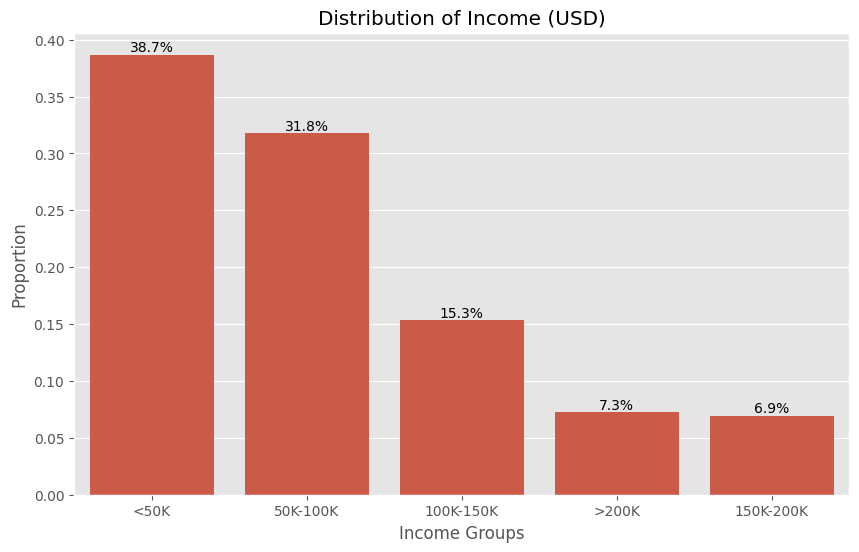



Most respondents are earning less than $50K a year. As the income group increases, the number of respondents earning that income group decreases.
Except there was a marginally more respondents earning more than 200K than those in the income group earning between 150K to 200K.


These are the distribution of income across the respondents in this survey.

Income Group: No. of Respondents
- <50K:  0.386820409001555
- 50K-100K:  0.3178967520464748
- 100K-150K:  0.15323254995158878
- >200K:  0.07272320511692046






In [15]:
# Income

# income groups
income = heart_df_dropall['income_groups'].value_counts(normalize=True)

# set graph size
plt.figure(figsize=(10,6))

# plot histogram
income_plot = sns.barplot(x = income.index, y = income.values)


# add plot information
plt.xlabel('Income Groups')
plt.ylabel('Proportion')
plt.title('Distribution of Income (USD)')

# annotate bar height
for bar in income_plot.patches:
    income_plot.annotate(format(bar.get_height(), '.1%'),
                     (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                     ha='center', va='bottom')

plt.show()


print(f'''

Most respondents are earning less than $50K a year. As the income group increases, the number of respondents earning that income group decreases.
Except there was a marginally more respondents earning more than 200K than those in the income group earning between 150K to 200K.


These are the distribution of income across the respondents in this survey.

Income Group: No. of Respondents
- {income.index[0]}:  {income.iloc[0]}
- {income.index[1]}:  {income.iloc[1]}
- {income.index[2]}:  {income.iloc[2]}
- {income.index[3]}:  {income.iloc[3]}



''')



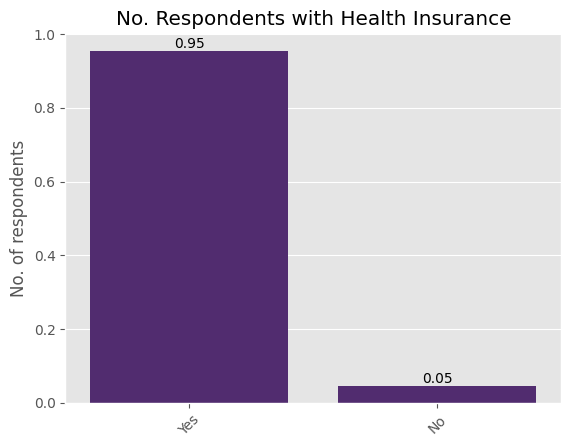



95.48% of the respondents possess health insurance
4.52% of the respondents do not have health insurance





In [16]:
# Health Insurance

health_insurance = heart_df_dropall['health_insurance'].value_counts(normalize=True)

# plot
health_insurance_plot = sns.barplot(x = health_insurance.index, y = health_insurance.values, color = '#52217a')

# add plot info
plt.xticks(rotation = 45, ha = 'center')
plt.xlabel('')
plt.ylabel('No. of respondents')
plt.title('No. Respondents with Health Insurance')

# annotate bar height
for bar in health_insurance_plot.patches:
    health_insurance_plot.annotate(format(bar.get_height(), '.2f'),
                     (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                     ha='center', va='bottom')
plt.show()

within_2_years = health_insurance.iloc[0] + health_insurance.iloc[1]

print(f'''

{health_insurance.iloc[0]:.2%} of the respondents possess health insurance
{health_insurance.iloc[1]:.2%} of the respondents do not have health insurance


''')

### 2A.3 Body Measurements

Weight, height, and the body mass index (BMI) as these could potentially be indicators for a person's current health state.

In [17]:
# Create a custom function to obtain the quartile ranges

# Define function to get iqr
def get_iqr(some_dataframe, col):
    # Calculate Q1 and Q3
    Q1 = some_dataframe[col].quantile(0.25)
    Q3 = some_dataframe[col].quantile(0.75)

    # Calculate the IQR
    IQR = Q3 - Q1
    median_value = np.median(some_dataframe[col])

    # Define the multiplier
    multiplier = 1.5

    # Define outliers
    outliers = some_dataframe[(some_dataframe[col] < (Q1 - multiplier * IQR)) | (some_dataframe[col] > (Q3 + multiplier * IQR))]

    return outliers, Q1, Q3, median_value



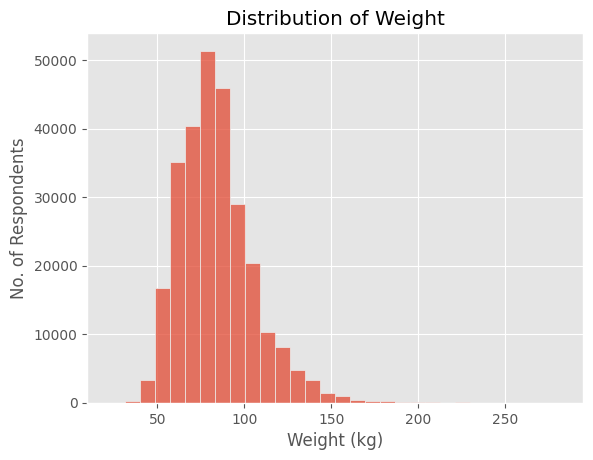

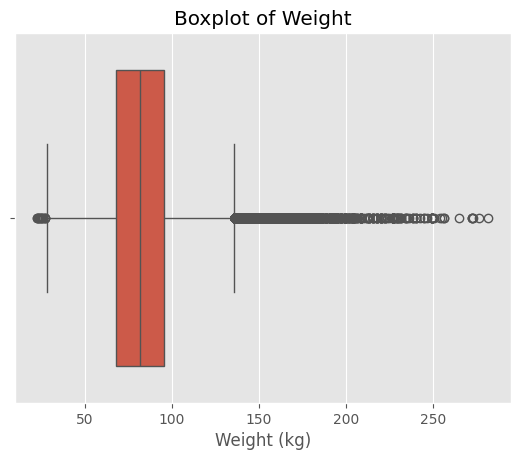



        Histogram:
Lowest weight recorded: 22.68kg
Greatest weight recorded: 281.68kg
Average weight of respondents: 84.06kg
Median weight of respondents: 81.65kg

The histogram plot is normally distributed with a long positive tail.

        Boxplot:
The 25th percentle: 68.04
The 50th percentle: 81.65
The 75th percentle: 95.25

The boxplot shows greater numbers of outliers in higher weight classes than lower weight,
indicating that it is more common for the average respondent to be overweight than to be underweight.


However, these outliers are important in the analysis of heart disease as they potentially are observable physical
indicators that could represent the person's lifestyle and overall health. As such, they will be kept in this analysis.




In [18]:
# Weight distribution of the respondents

# key statistics
min_weight = heart_df_dropall['weight'].min()
max_weight = heart_df_dropall['weight'].max()
mean_weight = heart_df_dropall['weight'].mean()
median_weight = heart_df_dropall['weight'].median()

# Using custom function, get the stats for weight
outlier_weight, Q1_weight, Q3_weight, median_weight = get_iqr(heart_df_dropall, 'weight')


### PLOT HISTOGRAM
sns.histplot(data = heart_df_dropall, x = 'weight', bins = 30)

# add plot info
plt.xlabel('Weight (kg)')
plt.ylabel('No. of Respondents')
plt.title('Distribution of Weight')

plt.show()

######################################################################


### PLOT BOXPLOT
sns.boxplot(x='weight', data=heart_df_dropall)

# add plot info
plt.xlabel('Weight (kg)')
plt.ylabel('')
plt.title('Boxplot of Weight')


plt.show()

print(f'''

        Histogram:
Lowest weight recorded: {min_weight}kg
Greatest weight recorded: {max_weight}kg
Average weight of respondents: {mean_weight:.2f}kg
Median weight of respondents: {median_weight:.2f}kg

The histogram plot is normally distributed with a long positive tail.

        Boxplot:
The 25th percentle: {Q1_weight}
The 50th percentle: {median_weight}
The 75th percentle: {Q3_weight}

The boxplot shows greater numbers of outliers in higher weight classes than lower weight,
indicating that it is more common for the average respondent to be overweight than to be underweight.


However, these outliers are important in the analysis of heart disease as they potentially are observable physical
indicators that could represent the person's lifestyle and overall health. As such, they will be kept in this analysis.

''')

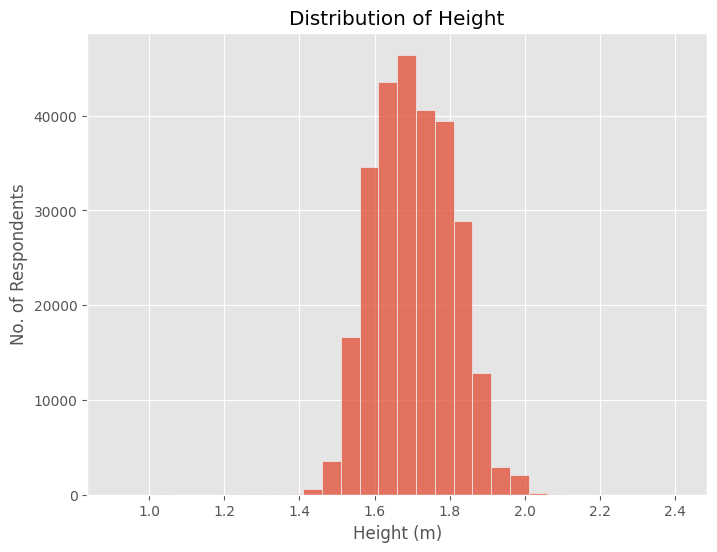

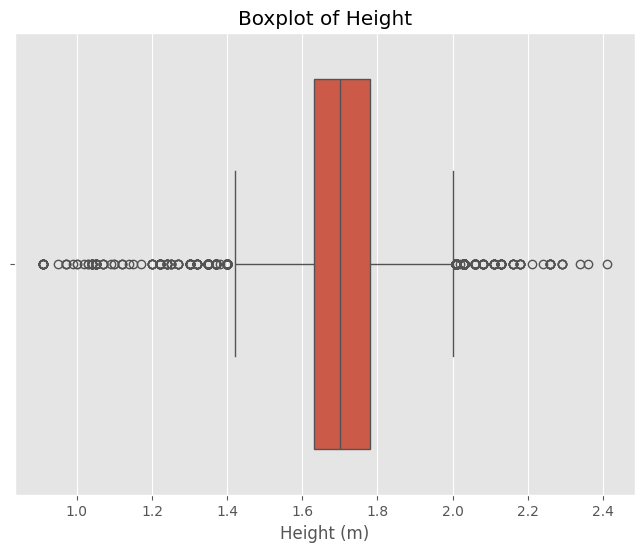



        Histogram:
Lowest height recorded: 0.91 m
Greatest height recorded: 2.41 m
Average height of respondents: 1.71 m
Median height of respondents: 1.70 m

The histogram plot is somewhat normally distributed.


        Boxplot:
The 25th percentle: 1.63 m
The 50th percentle: 1.7 m
The 75th percentle: 1.78 m

The boxplot shows marginally balanced of outliers for those who are taller and shorter than the 1.5 times the inter-quartile range.

Similar to weight, these outliers are important in the analysis of heart disease as they potentially are observable physical
indicators that could represent the person's lifestyle and overall health. As such, they will be kept in this analysis.




In [19]:
# Height distribution of the respondents

# key statistics
min_height = heart_df_dropall['height'].min()
max_height = heart_df_dropall['height'].max()
mean_height = heart_df_dropall['height'].mean()
median_height = heart_df_dropall['height'].median()

# Using custom function, get the stats for height
outlier_height, Q1_height, Q3_height, median_height = get_iqr(heart_df_dropall, 'height')


### PLOT HISTOGRAM

# set graph size
plt.figure(figsize=(8,6))

# plot histogram of height
sns.histplot(data = heart_df_dropall, x = 'height', bins = 30)

# add plot info
plt.xlabel('Height (m)')
plt.ylabel('No. of Respondents')
plt.title('Distribution of Height')
plt.show()


### PLOT BOXPLOT

# set graph size
plt.figure(figsize=(8,6))

sns.boxplot(x='height', data=heart_df_dropall)

# add plot info
plt.xlabel('Height (m)')
plt.ylabel('')
plt.title('Boxplot of Height')


plt.show()

print(f'''

        Histogram:
Lowest height recorded: {min_height} m
Greatest height recorded: {max_height} m
Average height of respondents: {mean_height:.2f} m
Median height of respondents: {median_height:.2f} m

The histogram plot is somewhat normally distributed.


        Boxplot:
The 25th percentle: {Q1_height} m
The 50th percentle: {median_height} m
The 75th percentle: {Q3_height} m

The boxplot shows marginally balanced of outliers for those who are taller and shorter than the 1.5 times the inter-quartile range.

Similar to weight, these outliers are important in the analysis of heart disease as they potentially are observable physical
indicators that could represent the person's lifestyle and overall health. As such, they will be kept in this analysis.

''')

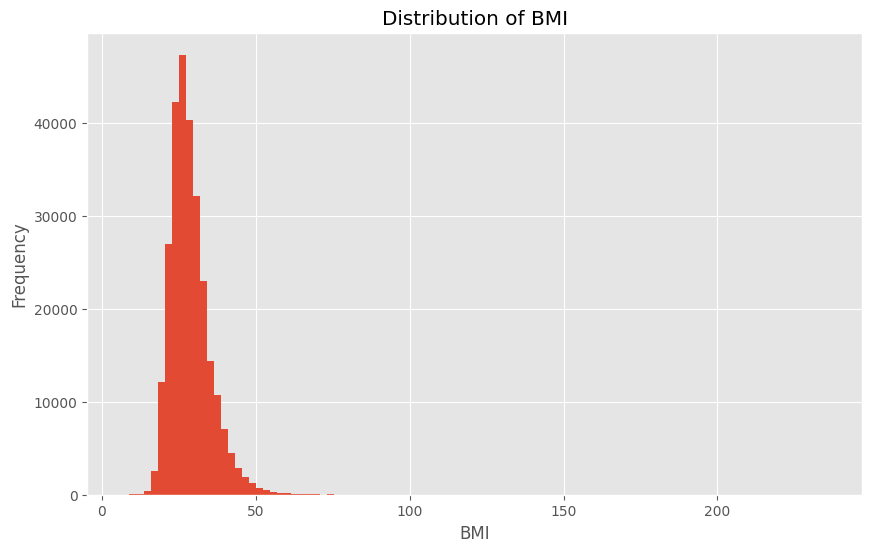

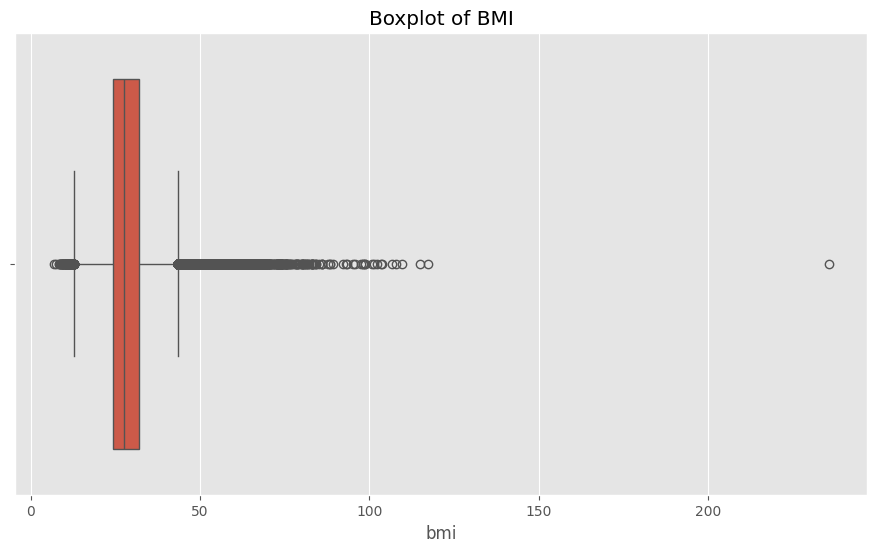



        Histogram:
Lowest bmi recorded: 6.77
Greatest bmi recorded: 235.53
Average bmi of respondents: 28.75
Median bmi of respondents: 27.60

The distribution of BMI is normally distributed among respondents with a long positive skewed tail, indicating that there are
respondents who are on the heavier side.


        Boxplot:
The 25th percentle: 24.33
The 50th percentle: 27.6
The 75th percentle: 31.97

The boxplot shows greater numbers of outliers with higher body-mass index. The use of BMI is a metric that uses height and weight
to classify a person into weight categories.

The boxplot shows a single respondent who has a BMI in excess of 200.

However, these outliers are important in the analysis of heart disease as they potentially are observable physical
indicators that could represent the person's lifestyle and overall health. As such, they will be kept in this analysis.




In [20]:
# BMI distribution of the respondents

# key statistics
min_bmi = heart_df_dropall['bmi'].min()
max_bmi = heart_df_dropall['bmi'].max()
mean_bmi = heart_df_dropall['bmi'].mean()
median_bmi = heart_df_dropall['bmi'].median()

# Using custom function, get the stats for bmi
outlier_bmi, Q1_bmi, Q3_bmi, median_bmi = get_iqr(heart_df_dropall, 'bmi')

### PLOT HISTOGRAM

# set graph size
plt.figure(figsize=(10,6))

# plot histogram of bmi
heart_df_dropall['bmi'].plot(kind='hist', bins = 100)

# add plot info
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.title('Distribution of BMI')

plt.show()

### PLOT BOXPLOT

# set graph size
plt.figure(figsize=(11,6))

sns.boxplot(x='bmi', data=heart_df_dropall)

# add plot info
plt.xlabel('bmi')
plt.ylabel('')
plt.title('Boxplot of BMI')


plt.show()

print(f'''

        Histogram:
Lowest bmi recorded: {min_bmi}
Greatest bmi recorded: {max_bmi}
Average bmi of respondents: {mean_bmi:.2f}
Median bmi of respondents: {median_bmi:.2f}

The distribution of BMI is normally distributed among respondents with a long positive skewed tail, indicating that there are
respondents who are on the heavier side.


        Boxplot:
The 25th percentle: {Q1_bmi}
The 50th percentle: {median_bmi}
The 75th percentle: {Q3_bmi}

The boxplot shows greater numbers of outliers with higher body-mass index. The use of BMI is a metric that uses height and weight
to classify a person into weight categories.

The boxplot shows a single respondent who has a BMI in excess of 200.

However, these outliers are important in the analysis of heart disease as they potentially are observable physical
indicators that could represent the person's lifestyle and overall health. As such, they will be kept in this analysis.

''')

In [21]:
print(outlier_bmi.sort_values(by = 'bmi', ascending=False).iloc[0])

age                                                     40.0
height                                                  0.91
weight                                                195.04
bmi                                                   235.53
yrssmok                                                 28.0
packday                                                  1.5
sleep_hours                                              8.0
health_status                                      Excellent
phys_health_not_good                               1-13 days
mental_health_not_good                             1-13 days
last_routine_checkup                        Within past year
visit_dentist_past_year                                  Yes
health_insurance                                         Yes
phy_exercise_past_30_days                                 No
stroke                                                    No
cancer                                                    No
kidney_disease          

### 2A.4 Past Histories

past medical histories are a contributing factor to heart disease.

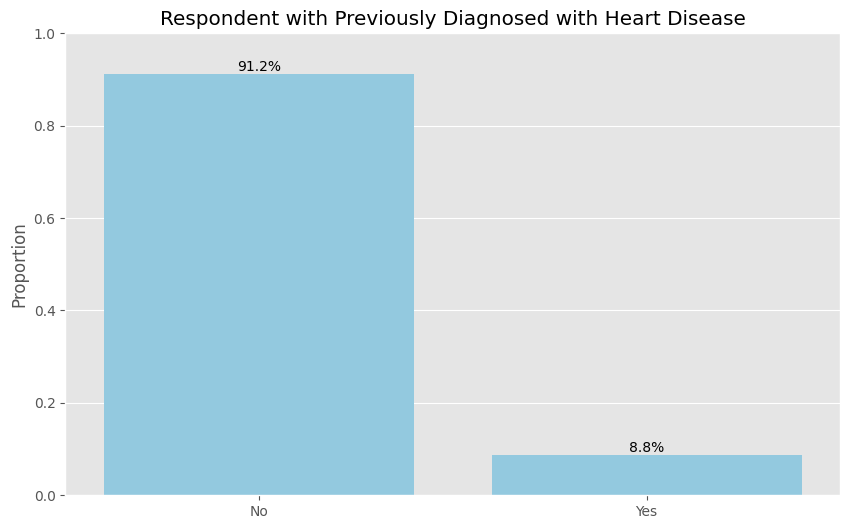



There are 23911 (8.77%) respondents out of 272664 were previously diagnosed with heart disease or had a heart attack.




In [22]:
# Past history of heart disease

# filter the data for heart disease
target = heart_df_dropall['chd_mi'].value_counts() # raw numbers
target_norm = heart_df_dropall['chd_mi'].value_counts(normalize=True) # proportion

# set graph size
plt.figure(figsize=(10,6))

# plot
target_norm_plot = sns.barplot(x = target_norm.index, y = target_norm.values, color = 'skyblue')

# add plot info
plt.xlabel('')
plt.ylabel('Proportion')
plt.ylim(0,1)
plt.title('Respondent with Previously Diagnosed with Heart Disease')

# annotate bar height
for bar in target_norm_plot.patches:
    target_norm_plot.annotate(format(bar.get_height(), '.1%'),
                     (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                     ha='center', va='bottom')

plt.show()

print(f'''

There are {target.iloc[1]} ({target_norm.iloc[1]:.2%}) respondents out of {len(heart_df_dropall)} were previously diagnosed with heart disease or had a heart attack.

''')

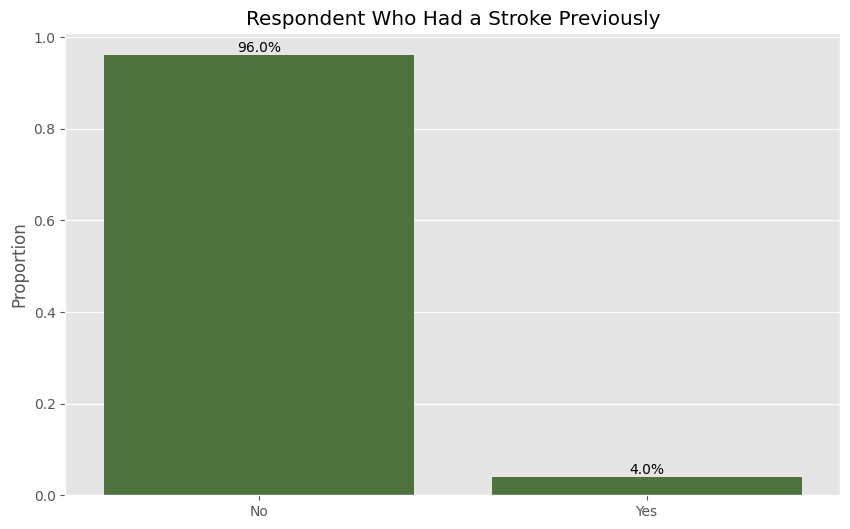



There are 10894 (4.00%) respondents out of 272664 had a stroke.




In [23]:
# Past history of stroke

# filter the data for stroke
stroke = heart_df_dropall['stroke'].value_counts() # raw numbers
stroke_norm = heart_df_dropall['stroke'].value_counts(normalize=True) # proportion

# set graph size
plt.figure(figsize=(10,6))

# plot
stroke_norm_plot = sns.barplot(x = stroke_norm.index, y = stroke_norm.values, color = '#4D7A36')

# add plot info
plt.xlabel('')
plt.ylabel('Proportion')
plt.title('Respondent Who Had a Stroke Previously')

# annotate bar height
for bar in stroke_norm_plot.patches:
    stroke_norm_plot.annotate(format(bar.get_height(), '.1%'),
                     (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                     ha='center', va='bottom')

plt.show()

print(f'''

There are {stroke.iloc[1]} ({stroke_norm.iloc[1]:.2%}) respondents out of {len(heart_df_dropall)} had a stroke.

''')

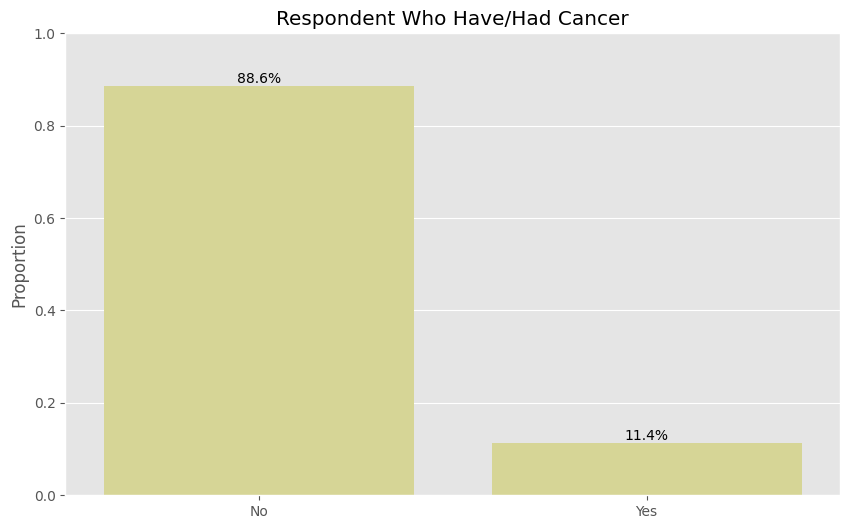



There are 30992 (11.37%) respondents out of 272664 had cancer.




In [24]:
# Past history of cancer

# filter the data for cancer
cancer = heart_df_dropall['cancer'].value_counts() # raw numbers
cancer_norm = heart_df_dropall['cancer'].value_counts(normalize=True) # proportion

# set graph size
plt.figure(figsize=(10,6))

# plot
cancer_norm_plot = sns.barplot(x = cancer_norm.index, y = cancer_norm.values, color = '#E1E08B')

# add plot info
plt.xlabel('')
plt.ylabel('Proportion')
plt.ylim(0,1)
plt.title('Respondent Who Have/Had Cancer')

# annotate bar height
for bar in cancer_norm_plot.patches:
    cancer_norm_plot.annotate(format(bar.get_height(), '.1%'),
                     (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                     ha='center', va='bottom')

plt.show()

print(f'''

There are {cancer.iloc[1]} ({cancer_norm.iloc[1]:.2%}) respondents out of {len(heart_df_dropall)} had cancer.

''')

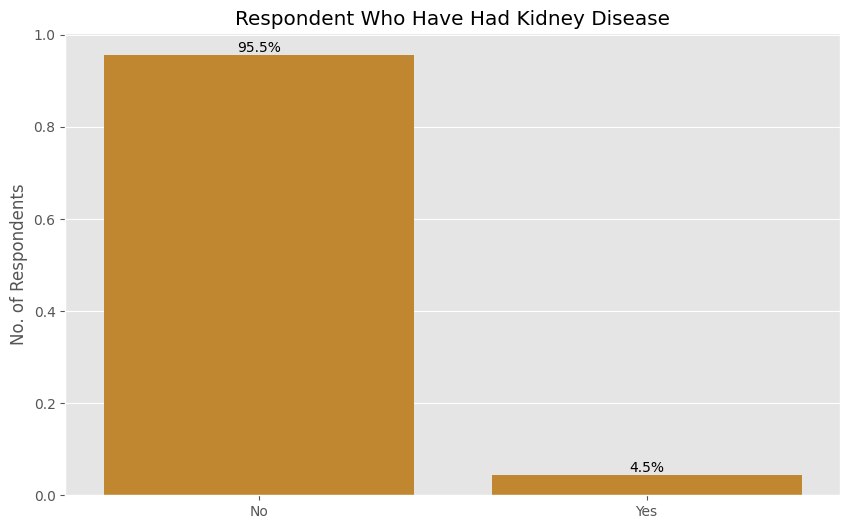



There are 12164 (4.46%) respondents out of 272664 had a kidney disease.




In [25]:
# Past history of kidney disease

# filter the data for kidney disease
kidney_disease = heart_df_dropall['kidney_disease'].value_counts() # raw numbers
kidney_disease_norm = heart_df_dropall['kidney_disease'].value_counts(normalize=True) # proportion

# set graph size
plt.figure(figsize=(10,6))

# plot
kidney_disease_norm_plot = sns.barplot(x = kidney_disease_norm.index, y = kidney_disease_norm.values, color = '#D98C18')

# add plot info
plt.xlabel('')
plt.ylabel('No. of Respondents')
plt.title('Respondent Who Have Had Kidney Disease')


# annotate bar height
for bar in kidney_disease_norm_plot.patches:
    kidney_disease_norm_plot.annotate(format(bar.get_height(), '.1%'),
                     (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                     ha='center', va='bottom')

plt.show()

print(f'''

There are {kidney_disease.iloc[1]} ({kidney_disease_norm.iloc[1]:.2%}) respondents out of {len(heart_df_dropall)} had a kidney disease.

''')

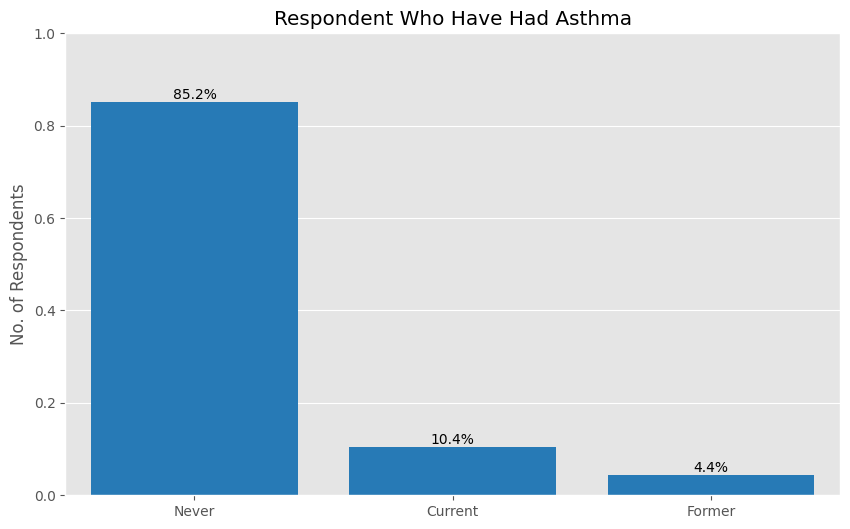



There are:
      232282 (85.19%) respondents out of 272664 who never had asthma
      28363 (10.40%) respondents out of 272664 who are currently asthmatic
      12019 (4.41%) respondents out of 272664 who were formerly asthmatic




In [26]:
# Past history of Asthma

# filter the data for kidney disease
asthma_status = heart_df_dropall['asthma_status'].value_counts() # raw numbers
asthma_status_norm = heart_df_dropall['asthma_status'].value_counts(normalize=True) # proportion

# set graph size
plt.figure(figsize=(10,6))

# plot
asthma_status_norm_plot = sns.barplot(x = asthma_status_norm.index, y = asthma_status_norm.values, color = '#0F7ECE')

# add plot info
plt.xlabel('')
plt.ylabel('No. of Respondents')
plt.ylim(0,1)
plt.title('Respondent Who Have Had Asthma')

# annotate bar height
for bar in asthma_status_norm_plot.patches:
    asthma_status_norm_plot.annotate(format(bar.get_height(), '.1%'),
                     (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                     ha='center', va='bottom')

plt.show()

print(f'''

There are:
      {asthma_status.iloc[0]} ({asthma_status_norm.iloc[0]:.2%}) respondents out of {len(heart_df_dropall)} who never had asthma
      {asthma_status.iloc[1]} ({asthma_status_norm.iloc[1]:.2%}) respondents out of {len(heart_df_dropall)} who are currently asthmatic
      {asthma_status.iloc[2]} ({asthma_status_norm.iloc[2]:.2%}) respondents out of {len(heart_df_dropall)} who were formerly asthmatic

''')

### 2A.5 Lifestyle Factors

Lifestyle choices are a contributing factor to heart disease.

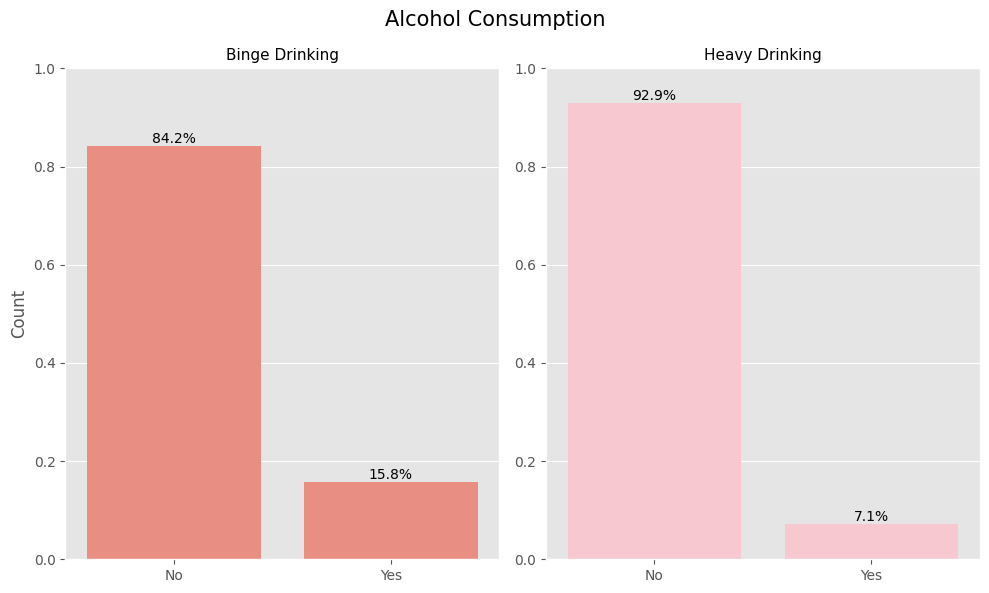



A small proportion of the respondents are indulge in binge drinking and heavy drinkers.

84.22% of the respondents do not indulge in binge drinking.
15.78% of the respondents do induldge in binge drinking

92.92% of the respondents are not heavy drinkers.
7.08% of the respondents are heavy drinkers





In [27]:
# Alcohol Consumption

# create subplots
fig, axes = plt.subplots(1,2, figsize=(10,6))


# Binge drinking
binge_drinking_norm = heart_df_dropall['binge_drinker'].value_counts(normalize=True)

binge_drinking_norm_plot = sns.barplot(x = binge_drinking_norm.index, y = binge_drinking_norm.values, color = 'salmon', ax = axes[0])
axes[0].set_xlabel('')
axes[0].set_ylabel('Count')
axes[0].set_ylim(0,1)
axes[0].set_title('Binge Drinking', fontsize = 11)

# annotate bar height
for bar in binge_drinking_norm_plot.patches:
    binge_drinking_norm_plot.annotate(format(bar.get_height(), '.1%'),
                     (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                     ha='center', va='bottom')

# heavy drinking
heavy_drinker_norm = heart_df_dropall['heavy_drinker'].value_counts(normalize=True)

heavy_drinker_norm_plot = sns.barplot(x = heavy_drinker_norm.index, y = heavy_drinker_norm.values, color = 'pink', ax = axes[1])
axes[1].set_xlabel('')
axes[1].set_ylabel('')
axes[1].set_ylim(0,1)
axes[1].set_title('Heavy Drinking', fontsize = 11)

# annotate bar height
for bar in heavy_drinker_norm_plot.patches:
    heavy_drinker_norm_plot.annotate(format(bar.get_height(), '.1%'),
                     (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                     ha='center', va='bottom')


plt.suptitle('Alcohol Consumption', fontsize = 15)
plt.tight_layout()
plt.show()

print(f'''

A small proportion of the respondents are indulge in binge drinking and heavy drinkers.

{binge_drinking_norm.iloc[0]:.2%} of the respondents do not indulge in binge drinking.
{binge_drinking_norm.iloc[1]:.2%} of the respondents do induldge in binge drinking

{heavy_drinker_norm.iloc[0]:.2%} of the respondents are not heavy drinkers.
{heavy_drinker_norm.iloc[1]:.2%} of the respondents are heavy drinkers


''')


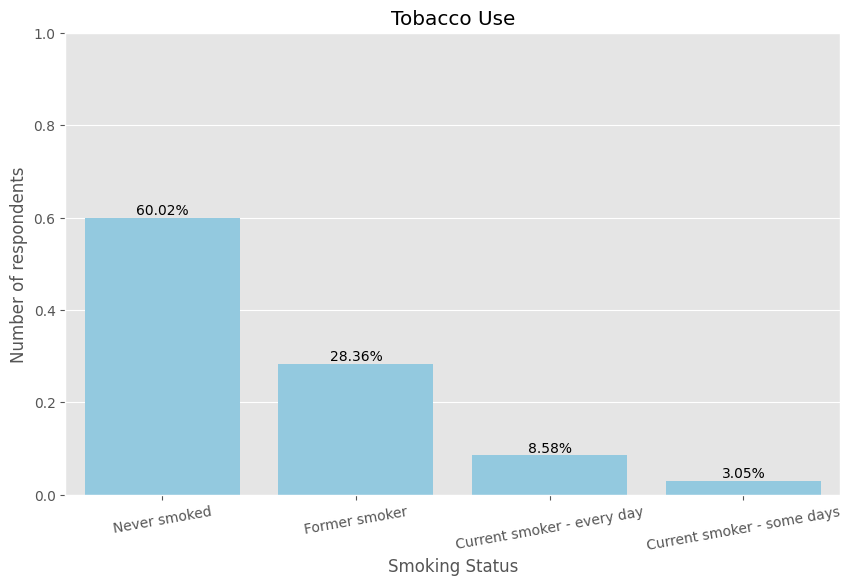



In this survey,
      - 60.02% of respondents have never smoked
      - 28.36% were former smokers
      - 8.58% are current smokers
      - 3.05% are smoker on some days





In [28]:
# Tobacco Usage

# Smoking Status
smoke_status = heart_df_dropall['smoker_status'].value_counts(normalize=True)
# print(smoke_status) # debug


# set graph size
plt.figure(figsize=(10,6))

# plot barplot
smoke_status_plot = sns.barplot(x = smoke_status.index, y = smoke_status.values, color = 'skyblue')

# add plot info
plt.xlabel('Smoking Status')
plt.xticks(rotation = 10, ha = 'center')
plt.ylabel('Number of respondents')
plt.ylim(0,1)
plt.title('Tobacco Use')

# annotate bar height
for bar in smoke_status_plot.patches:
    smoke_status_plot.annotate(format(bar.get_height(), '.2%'),
                     (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                     ha='center', va='bottom')

plt.show()


print(f'''

In this survey,
      - {smoke_status.iloc[0]:.2%} of respondents have never smoked
      - {smoke_status.iloc[1]:.2%} were former smokers
      - {smoke_status.iloc[2]:.2%} are current smokers
      - {smoke_status.iloc[3]:.2%} are smoker on some days


''')

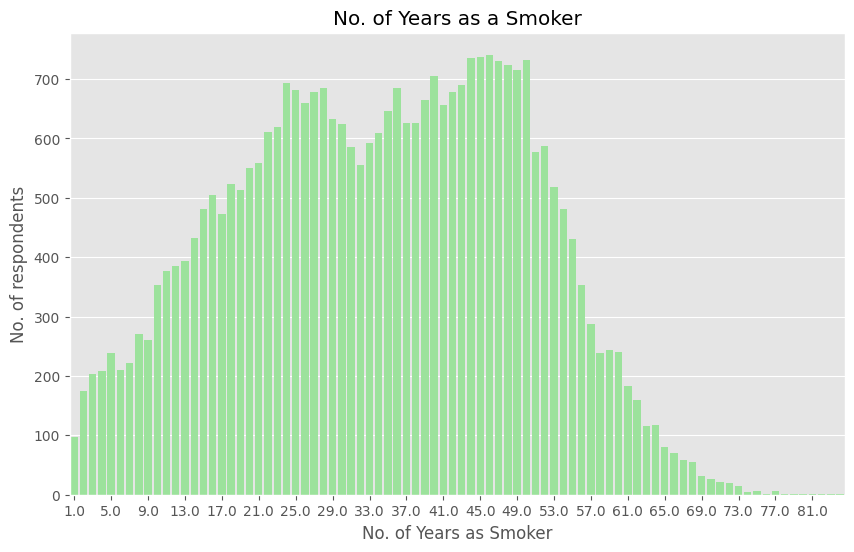

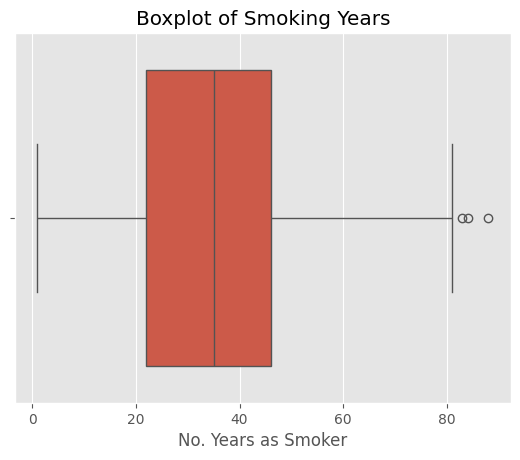



In this survey, there is a large number of smokers who had smoked for 45-50 years with the longest
a 88.0 years


The boxplot shows that those who smoke were smoking for a median duration of 35.0 years and were generally
found to be smoking between 22.0 and 46.0 years.

The boxplot shows outliers smoking for at least 80 years. As the numbers are small, we will drop those who have
smoked for at least 80 years.




In [29]:
# filter df to number of years smoke greater than 0
smokers = heart_df_dropall[heart_df_dropall['yrssmok']>0]

num_yrs_smoke = smokers['yrssmok'].value_counts()

num_yrs_smoke_sorted = num_yrs_smoke.sort_index()

# Using custom function, get the stats for number of years as a smoker
outlier_yrssmoke, Q1_yrssmoke, Q3_yrssmoke, median_yrssmoke = get_iqr(smokers, 'yrssmok')

# set figure size
plt.figure(figsize=(10,6))

num_yrs_smoke_plot = sns.barplot(x = num_yrs_smoke.index, y = num_yrs_smoke.values, color = 'lightgreen')
plt.xlabel('No. of Years as Smoker')
plt.ylabel('No. of respondents')
plt.title('No. of Years as a Smoker')

# Calculate the position of each bar
bar_positions = range(len(num_yrs_smoke_sorted.index))

# Set xticks to the center of each bar
plt.xticks(ticks=bar_positions[::4], labels=num_yrs_smoke_sorted.index[::4], rotation=0, ha='center')


plt.show()

######################################################################


### PLOT BOXPLOT

sns.boxplot(x='yrssmok', data=smokers)

# add plot info
plt.xlabel('No. Years as Smoker')
plt.ylabel('')
plt.title('Boxplot of Smoking Years')


plt.show()

longest_smoker = num_yrs_smoke.max()


print(f'''

In this survey, there is a large number of smokers who had smoked for 45-50 years with the longest
a {num_yrs_smoke.sort_index(ascending=False).index[0]} years


The boxplot shows that those who smoke were smoking for a median duration of {median_yrssmoke} years and were generally
found to be smoking between {Q1_yrssmoke} and {Q3_yrssmoke} years.

The boxplot shows outliers smoking for at least 80 years. As the numbers are small, we will drop those who have
smoked for at least 80 years.

''')


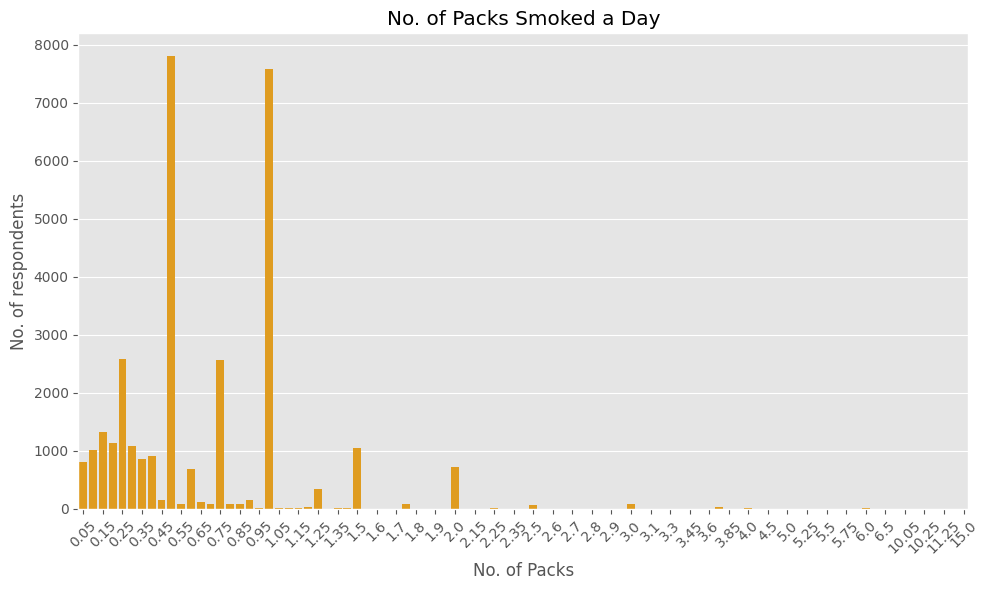

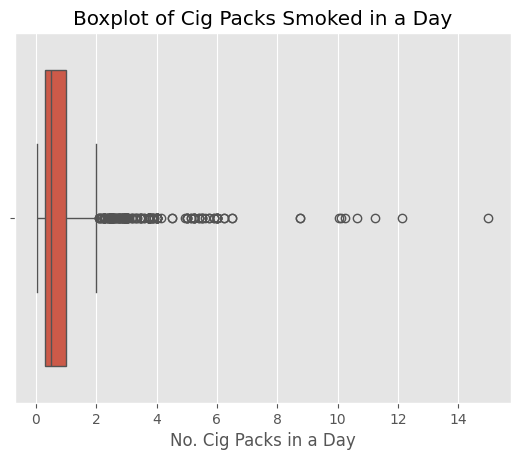



Typically, smokers smoke about 0.5 to 1.0 pack a day.


There are 7 respondents that smoke more than 10 packs in a single day!


The boxplot shows the median number of packs smoked per day to be 0.5 and outliers are
considered as those who have smoked more than 2 packs in a day.

The boxplot shows a range of cig packs that smokers smoke in a day. We have decided to remove those that
smoke at least 8 packs a day as outliers. Oberserving that theere is a gap between 6.5 to 8 packs of cig smoked
a day, we do not want to leave out crucial information about heavy smokers.




In [30]:
# number of packs a day
pack_a_day = smokers['packday'].value_counts()

# Using custom function, get the stats for number of cig packs smoked in a day
outlier_packday, Q1_packday, Q3_packday, median_packday = get_iqr(smokers, 'packday')

# set figure size
plt.figure(figsize=(10,6))

# plot number of packs smoked in a day
pack_a_day_plot = sns.barplot(x = pack_a_day.index, y = pack_a_day.values, color = 'orange')

# include plot info
plt.xlabel('No. of Packs')
plt.ylabel('No. of respondents')
plt.title('No. of Packs Smoked a Day')


pack_a_day_sorted = pack_a_day.sort_index()
# Calculate the position of each bar
bar_positions = range(len(pack_a_day_sorted.index))

# Set xticks to the center of each bar
plt.xticks(ticks=bar_positions[::2], labels=pack_a_day_sorted.index[::2], rotation=45, ha='center')

plt.tight_layout()
plt.show()

######################################################################


### PLOT BOXPLOT

sns.boxplot(x='packday', data=smokers)

# add plot info
plt.xlabel('No. Cig Packs in a Day')
plt.ylabel('')
plt.title('Boxplot of Cig Packs Smoked in a Day')


plt.show()




# to find out how many respondents smoke more than 10 packs a day

# sort the index so higher number of packs are at the top
num_packs = pack_a_day.sort_index(ascending=False)

# set a condition
really_heavy_smoker = num_packs.index > 10

# obtain total number of respondents that satisfy the condition
total_values = really_heavy_smoker.sum()


print(f'''

Typically, smokers smoke about {pack_a_day.sort_values(ascending=False).index[0]} to {pack_a_day.sort_values(ascending=False).index[1]} pack a day.


There are {total_values} respondents that smoke more than 10 packs in a single day!


The boxplot shows the median number of packs smoked per day to be {median_packday} and outliers are
considered as those who have smoked more than 2 packs in a day.

The boxplot shows a range of cig packs that smokers smoke in a day. We have decided to remove those that
smoke at least 8 packs a day as outliers. Oberserving that theere is a gap between 6.5 to 8 packs of cig smoked
a day, we do not want to leave out crucial information about heavy smokers.

''')

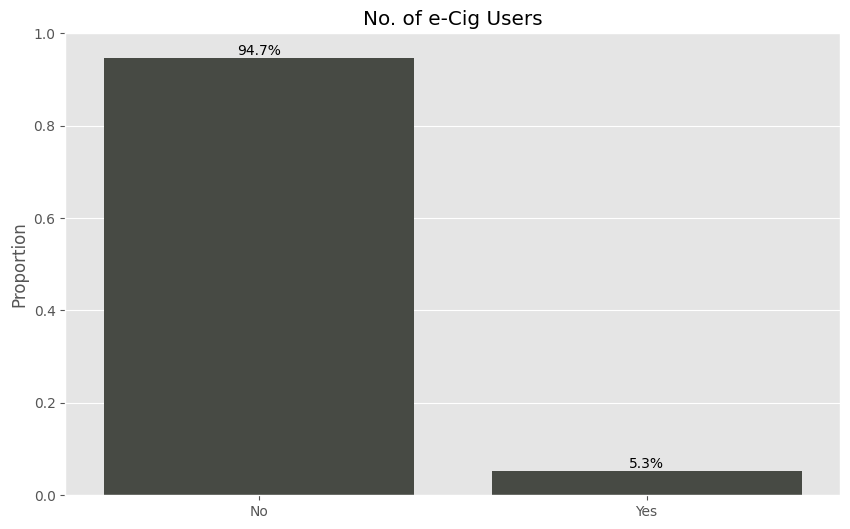



Out of the total number of 272664 respondents, 14515 (5.32%) are e-cig users.




In [31]:
# number of e-cig users
ecig = heart_df_dropall['e_cig_smoker'].value_counts()
ecig_norm = heart_df_dropall['e_cig_smoker'].value_counts(normalize=True)

# set figure size
plt.figure(figsize=(10,6))

# plot
ecig_norm_plot = sns.barplot(x = ecig_norm.index, y = ecig_norm.values, color = '#474B43')

# add plot info
plt.xlabel('')
plt.ylabel('Proportion')
plt.title('No. of e-Cig Users')
plt.ylim(0,1)

# annotate bar height
for bar in ecig_norm_plot.patches:
    ecig_norm_plot.annotate(format(bar.get_height(), '.1%'),
                     (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                     ha='center', va='bottom')

plt.show()

print(f'''

Out of the total number of {len(heart_df_dropall)} respondents, {ecig.iloc[1]} ({ecig_norm.iloc[1]:.2%}) are e-cig users.

''')

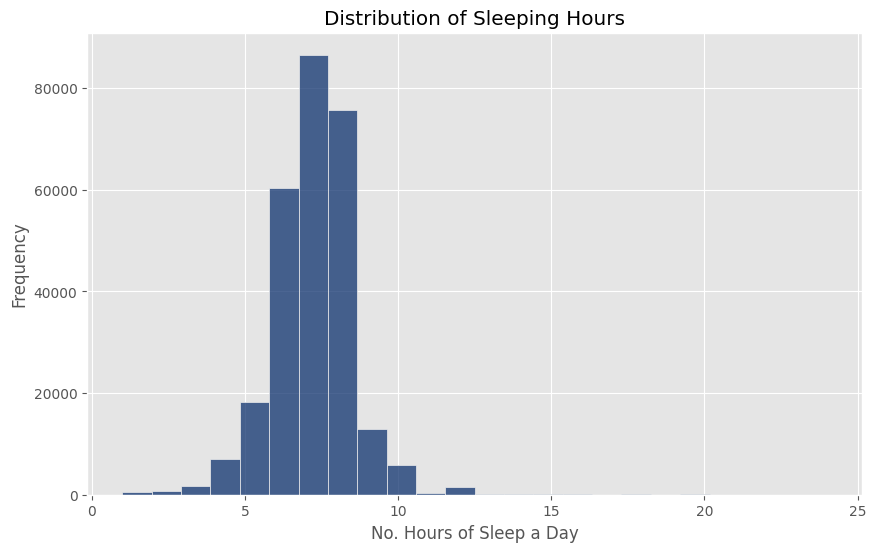



Lowest sleep_hours recorded: 1.0 hrs
Greatest sleep_hours recorded: 24.0 hrs
Average sleep_hours of respondents: 7.01 hrs
Median sleep_hours of respondents: 7.00 hrs


The distribution of sleep_hours is somewhat normally distributed among respondents with a long positive skewed tail.

The threshold for people who sleeps an excessive amount a day is considered as those who slept more than 10 hours a day.
In our sample respondents, there are 22 respondents who are considered oversleepers.

The threshold for people who sleeps a short number of hours a day is considered as those who slept less than 5 hours a day.
In our sample respondents, there are 10178 respondents who are considered undersleepers.




In [32]:
# Sleeping hours

# key statistics
min_sleep_hours = heart_df_dropall['sleep_hours'].min()
max_sleep_hours = heart_df_dropall['sleep_hours'].max()
mean_sleep_hours = heart_df_dropall['sleep_hours'].mean()
median_sleep_hours = heart_df_dropall['sleep_hours'].median()

# define threshold for oversleeping
oversleep_threshold = 10
oversleepers = heart_df_dropall[heart_df_dropall['sleep_hours'] > 20]

# define threshold for undersleeping
undersleep_threshold = 5
undersleepers = heart_df_dropall[heart_df_dropall['sleep_hours'] < 5]

# plot histogram of sleep_hours

# set figure size
plt.figure(figsize=(10,6))

# heart_df_dropall['sleep_hours'].plot(kind='hist', bins = 20)
sns.histplot(data=heart_df_dropall, x = 'sleep_hours', bins=24, color = '#0E326E')

# add plot info
plt.xlabel('No. Hours of Sleep a Day')
plt.ylabel('Frequency')
plt.title('Distribution of Sleeping Hours')

plt.show()

print(f'''

Lowest sleep_hours recorded: {min_sleep_hours} hrs
Greatest sleep_hours recorded: {max_sleep_hours} hrs
Average sleep_hours of respondents: {mean_sleep_hours:.2f} hrs
Median sleep_hours of respondents: {median_sleep_hours:.2f} hrs


The distribution of sleep_hours is somewhat normally distributed among respondents with a long positive skewed tail.

The threshold for people who sleeps an excessive amount a day is considered as those who slept more than 10 hours a day.
In our sample respondents, there are {len(oversleepers)} respondents who are considered oversleepers.

The threshold for people who sleeps a short number of hours a day is considered as those who slept less than 5 hours a day.
In our sample respondents, there are {len(undersleepers)} respondents who are considered undersleepers.

''')



### 2A.6 Past Medical Checkups or Health State





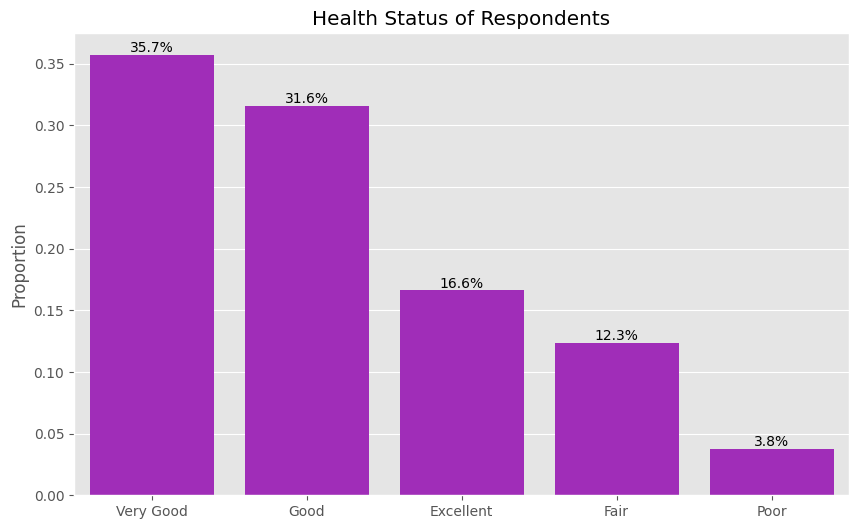



83.89% of respondents rated their health above good.





In [33]:
# health status
health_status = heart_df_dropall['health_status'].value_counts() # raw number
health_status_norm = heart_df_dropall['health_status'].value_counts(normalize=True) # proportion

# set figure size
plt.figure(figsize=(10,6))

# obtain the cumulative percentage values
health_good = np.cumsum(health_status_norm.iloc[:3].values)
health_good = health_good[-1]

# plot
health_status_norm_plot = sns.barplot(x = health_status_norm.index, y = health_status_norm.values, color = '#AF16CF')

# add plot info
plt.xlabel('')
plt.ylabel('Proportion')
plt.title('Health Status of Respondents')

# annotate bar height
for bar in health_status_norm_plot.patches:
    health_status_norm_plot.annotate(format(bar.get_height(), '.1%'),
                     (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                     ha='center', va='bottom')

plt.show()

print(f'''

{health_good:.2%} of respondents rated their health above good.


''')

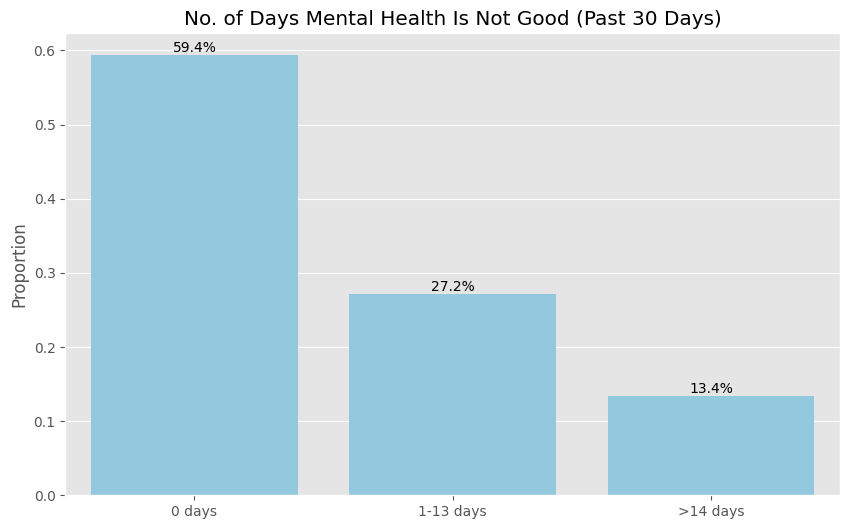




59.35% of respondents experience satisfactory mental health status in the last 30 days.
27.21% of respondents experience 1-13 days of poor mental health in the last 30 days.
13.44% of respondents experience more than 14 days of poor mental health in the last 30 days.





In [34]:
# Menta health status
mental_health_not_good = heart_df_dropall['mental_health_not_good'].value_counts() # raw number
mental_health_not_good_norm = heart_df_dropall['mental_health_not_good'].value_counts(normalize=True) # proportion

# set figure size
plt.figure(figsize=(10,6))

# plot
mental_health_not_good_norm_plot = sns.barplot(x = mental_health_not_good_norm.index, y = mental_health_not_good_norm.values, color = 'skyblue')

# add plot info
plt.xlabel('')
plt.ylabel('Proportion')
plt.title('No. of Days Mental Health Is Not Good (Past 30 Days)')


# annotate bar height
for bar in mental_health_not_good_norm_plot.patches:
    mental_health_not_good_norm_plot.annotate(format(bar.get_height(), '.1%'),
                     (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                     ha='center', va='bottom')

plt.show()

print(f'''


{mental_health_not_good_norm.iloc[0]:.2%} of respondents experience satisfactory mental health status in the last 30 days.
{mental_health_not_good_norm.iloc[1]:.2%} of respondents experience 1-13 days of poor mental health in the last 30 days.
{mental_health_not_good_norm.iloc[2]:.2%} of respondents experience more than 14 days of poor mental health in the last 30 days.


''')

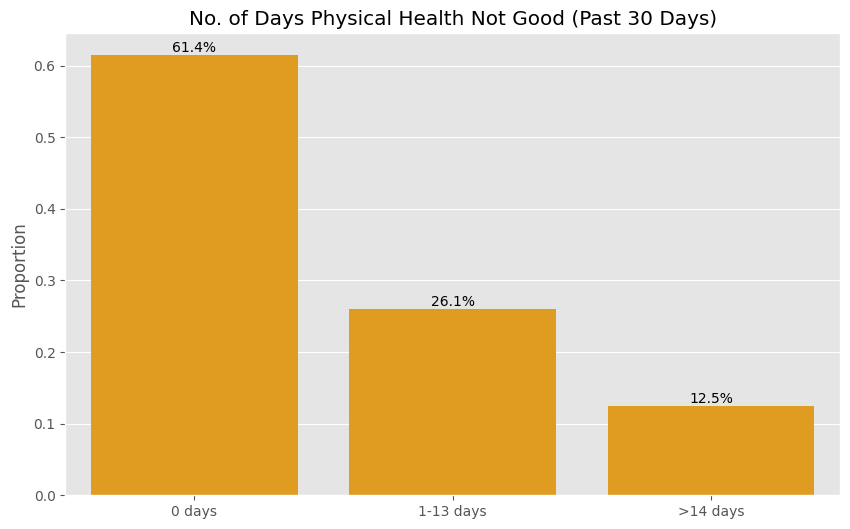




61.45% of respondents experience satisfactory physical health status in the last 30 days.
26.07% of respondents experience 1-13 days of poor physical health in the last 30 days.
12.48% of respondents experience more than 14 days of poor physical health in the last 30 days.





In [35]:
# Physical Health Status in the past 30 days
# This includes physical illness and injuries

phys_health_not_good = heart_df_dropall['phys_health_not_good'].value_counts() # raw number
phys_health_not_good_norm = heart_df_dropall['phys_health_not_good'].value_counts(normalize=True) # proportion

# set figure size
plt.figure(figsize=(10,6))

# plot
phys_health_not_good_norm_plot = sns.barplot(x = phys_health_not_good_norm.index, y = phys_health_not_good_norm.values, color = 'orange')

# add plot info
plt.xlabel('')
plt.ylabel('Proportion')
plt.title('No. of Days Physical Health Not Good (Past 30 Days)')

# annotate bar height
for bar in phys_health_not_good_norm_plot.patches:
    phys_health_not_good_norm_plot.annotate(format(bar.get_height(), '.1%'),
                     (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                     ha='center', va='bottom')

plt.show()

print(f'''


{phys_health_not_good_norm.iloc[0]:.2%} of respondents experience satisfactory physical health status in the last 30 days.
{phys_health_not_good_norm.iloc[1]:.2%} of respondents experience 1-13 days of poor physical health in the last 30 days.
{phys_health_not_good_norm.iloc[2]:.2%} of respondents experience more than 14 days of poor physical health in the last 30 days.


''')

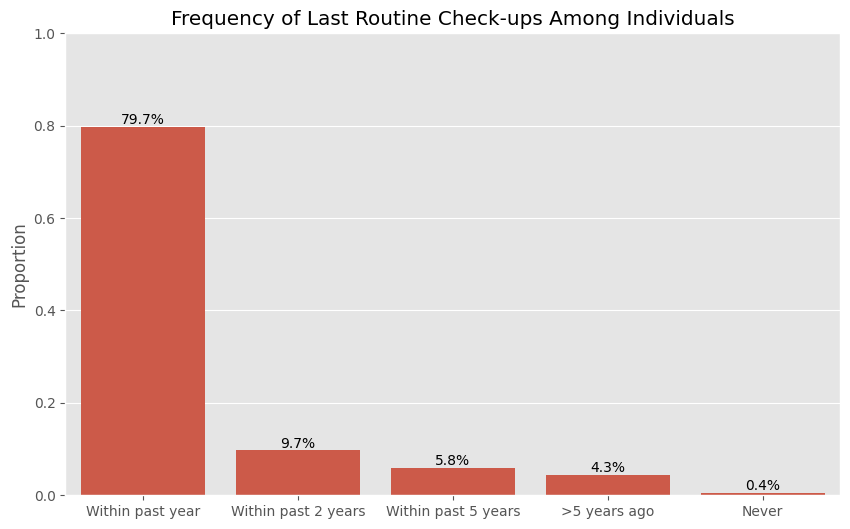



89.39% of the respondents had a checkup within the past 2 years
5.84% of the respondents had a checkup within the past 5 years
4.34% of the respondents had a checkup more than 5 years ago
0.44% never had a checkup




In [36]:
# Last Routine Check up

last_checked_norm = heart_df_dropall['last_routine_checkup'].value_counts(normalize=True)

# set figure size
plt.figure(figsize=(10,6))

# plot
last_checked_norm_plot = sns.barplot(x = last_checked_norm.index, y = last_checked_norm.values)

# add plot info
plt.xticks(rotation = 0, ha = 'center')
plt.xlabel('')
plt.ylabel('Proportion')
plt.ylim(0,1)
plt.title('Frequency of Last Routine Check-ups Among Individuals')

# annotate bar height
for bar in last_checked_norm_plot.patches:
    last_checked_norm_plot.annotate(format(bar.get_height(), '.1%'),
                     (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                     ha='center', va='bottom')
plt.show()

within_2_years = last_checked_norm.iloc[0] + last_checked_norm.iloc[1]

print(f'''

{(last_checked_norm.iloc[0] + last_checked_norm.iloc[1]):.2%} of the respondents had a checkup within the past 2 years
{last_checked_norm.iloc[2]:.2%} of the respondents had a checkup within the past 5 years
{(last_checked_norm.iloc[3]):.2%} of the respondents had a checkup more than 5 years ago
{last_checked_norm.iloc[4]:.2%} never had a checkup

''')

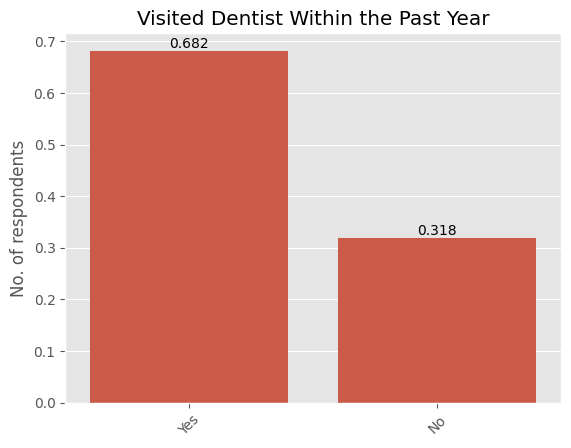



68.16% of the respondents had visited a dentist within the 12 months
31.84% of the respondents had not visited a dentist within the 12 months





In [37]:
# Last Dentist Visit

visit_dentist = heart_df_dropall['visit_dentist_past_year'].value_counts(normalize=True)

# plot
visit_dentist_plot = sns.barplot(x = visit_dentist.index, y = visit_dentist.values)

# add plot info
plt.xticks(rotation = 45, ha = 'center')
plt.xlabel('')
plt.ylabel('No. of respondents')
plt.title('Visited Dentist Within the Past Year')

# annotate bar height
for bar in visit_dentist_plot.patches:
    visit_dentist_plot.annotate(format(bar.get_height(), '.3f'),
                     (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                     ha='center', va='bottom')
plt.show()

within_2_years = visit_dentist.iloc[0] + visit_dentist.iloc[1]

print(f'''

{visit_dentist.iloc[0]:.2%} of the respondents had visited a dentist within the 12 months
{visit_dentist.iloc[1]:.2%} of the respondents had not visited a dentist within the 12 months


''')

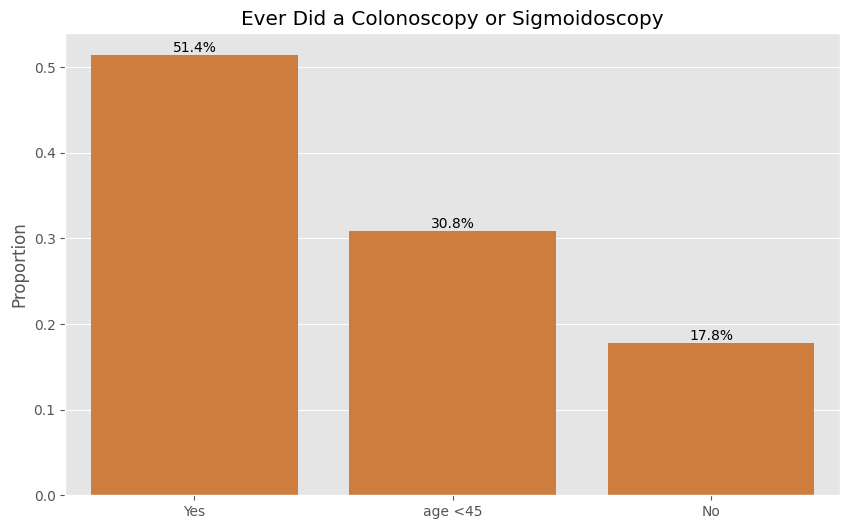



51.38% of the respondents had a colonoscopy or a sigmoidoscopy
30.84% of the respondents are below the age of 45
17.78% of the respondents never had a colonoscopy or a sigmoidoscopy





In [38]:
# Colonoscopy or Sigmoidoscopy
# These are exams to check for colorectal cancer
# Usually those below the age of 45 are not required for such tests

col_sig_norm = heart_df_dropall['colon_sigmoidoscopy'].value_counts(normalize=True)

# set figure size
plt.figure(figsize=(10,6))

# plot
col_sig_norm_plot = sns.barplot(x = col_sig_norm.index, y = col_sig_norm.values, color = '#E57A25')

# add plot info
plt.xticks(rotation = 0, ha = 'center')
plt.xlabel('')
plt.ylabel('Proportion')
plt.title('Ever Did a Colonoscopy or Sigmoidoscopy')

# annotate bar height
for bar in col_sig_norm_plot.patches:
    col_sig_norm_plot.annotate(format(bar.get_height(), '.1%'),
                     (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                     ha='center', va='bottom')
plt.show()

within_2_years = col_sig_norm.iloc[0] + col_sig_norm.iloc[1]

print(f'''

{col_sig_norm.iloc[0]:.2%} of the respondents had a colonoscopy or a sigmoidoscopy
{col_sig_norm.iloc[1]:.2%} of the respondents are below the age of 45
{col_sig_norm.iloc[2]:.2%} of the respondents never had a colonoscopy or a sigmoidoscopy


''')

### 2A.7 Comparisons with Null Values

As the dataset has many variables with null values, we will analyze the top 5 categorical variables with the most number of null values.

In [39]:
# subset original dataframe to only show categorical variables
df_cat = df_updated.iloc[:, 7:]

# sort and show the top 5 columns with the most null counts
print(df_cat.isna().sum().sort_values(ascending=False).head())

income_groups    96047
binge_drinker    51102
heavy_drinker    49705
e_cig_smoker     35660
smoker_status    35462
dtype: int64


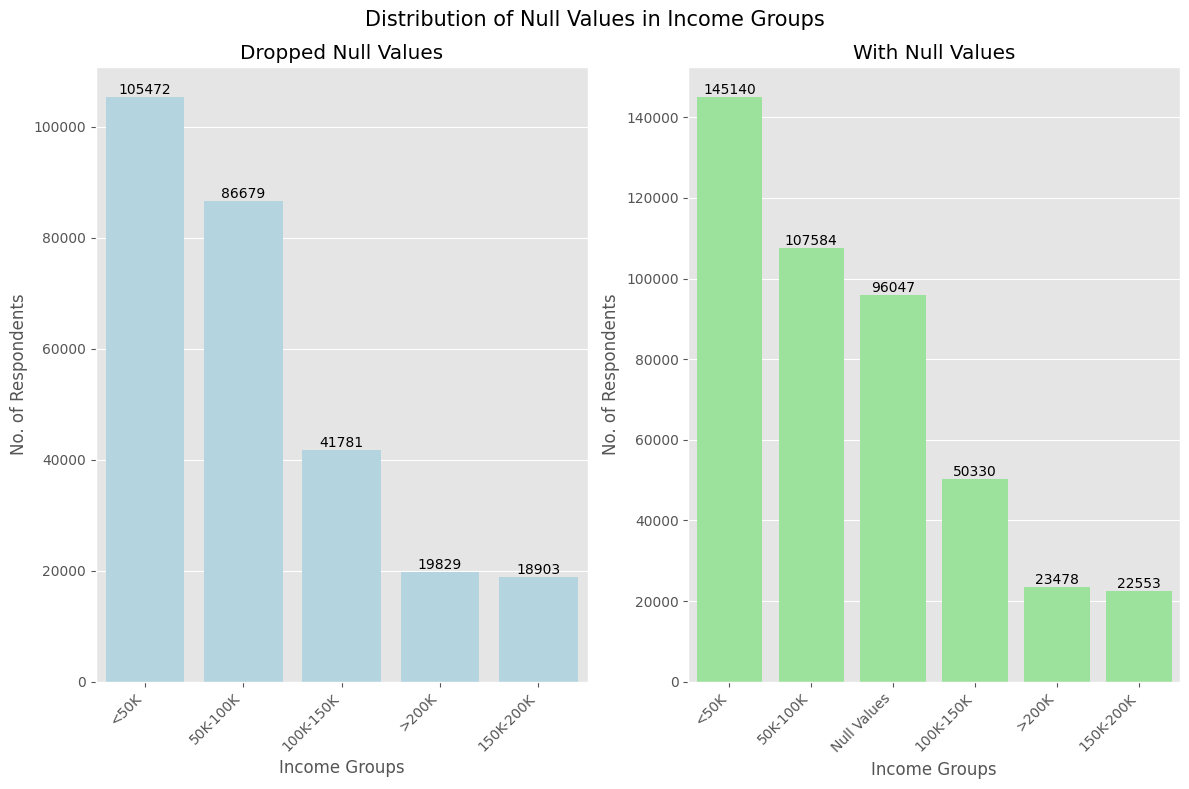

'

In this comparison plot, we can see that the distributions between income groups, excluding null values, remain to be similar.
The total number of respondents earning betwen 150K-200K and more than 200K are still close to each other.





      


In [40]:
# Comparisons of dropping all null values vs keeping null values in Income Groups

# set figure size
fig, axes = plt.subplots(1,2, figsize=(12,8))

# value counts for income groups dropped null values
income_dropped = heart_df_dropall['income_groups'].value_counts()

# plot dropped null values
income_dropped_plot = sns.barplot(x = income_dropped.index, y = income_dropped.values, color = 'lightblue', ax=axes[0])

# set plot info
axes[0].set_title('Dropped Null Values')
axes[0].set_xlabel('Income Groups')
axes[0].set_ylabel('No. of Respondents')
axes[0].set_xticks(range(len(income_dropped.index)))
axes[0].set_xticklabels(income_dropped.index, rotation=45, ha='right')

# Annotate bar values
for bar in income_dropped_plot.patches:
    axes[0].annotate(format(bar.get_height(), '.0f'),
                     (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                     ha='center', va='bottom')

##########################################################################################


# value counts for income groups WITH null values
income_null = df_updated['income_groups'].value_counts(dropna=False)

# Rename NaN values to 'Unknown' for visualization
income_null = income_null.rename({np.nan: 'Null Values'})

# plot with null values
income_null_plot = sns.barplot(x = income_null.index, y = income_null.values, color = 'lightgreen', ax= axes[1])
axes[1].set_title('With Null Values')
axes[1].set_xlabel('Income Groups')
axes[1].set_ylabel('No. of Respondents')
axes[1].set_xticks(range(len(income_null.index)))
axes[1].set_xticklabels(income_null.index, rotation=45, ha='right')


# Annotate bar values
for bar in income_null_plot.patches:
    axes[1].annotate(format(bar.get_height(), '.0f'),
                     (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                     ha='center', va='bottom')

plt.suptitle('Distribution of Null Values in Income Groups', fontsize = 15)
plt.tight_layout()

plt.show()

print(f''''

In this comparison plot, we can see that the distributions between income groups, excluding null values, remain to be similar.
The total number of respondents earning betwen 150K-200K and more than 200K are still close to each other.





      ''')

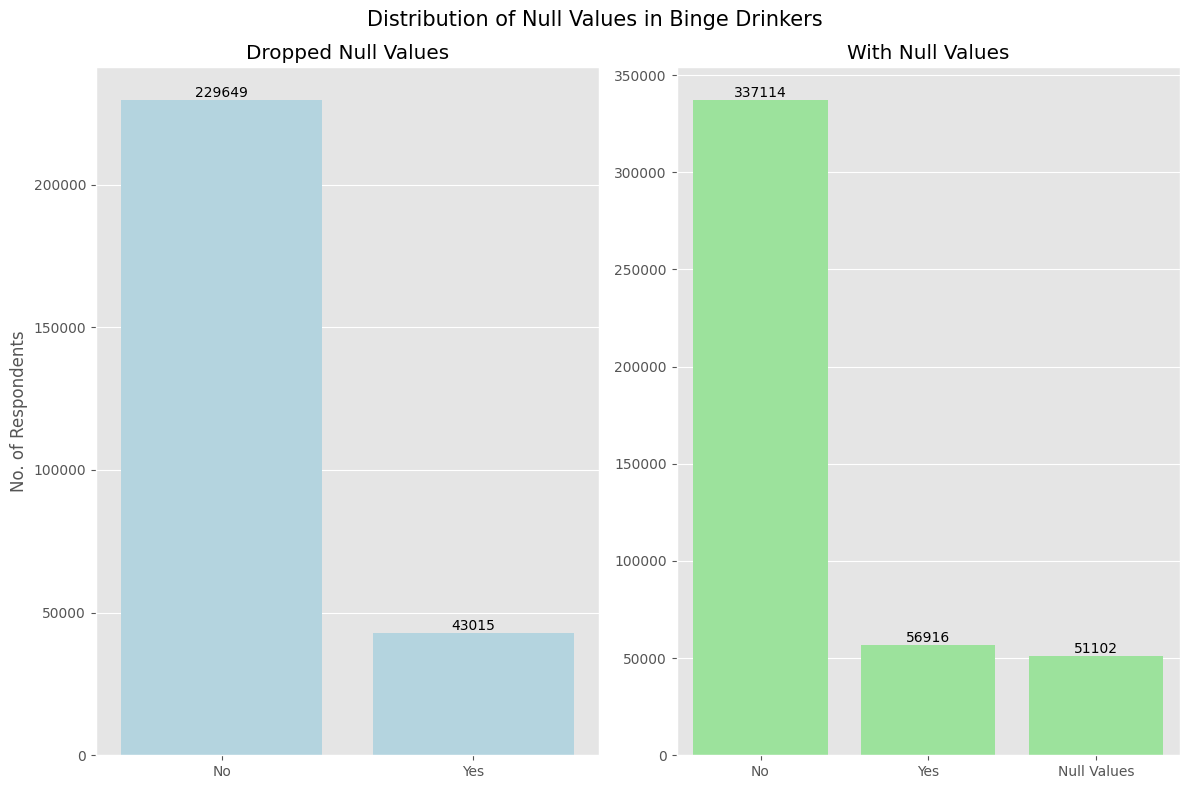

'

In this comparison plot, we can see that the distributions between the 2 plots are largely similar in distributions for 'Yes' and 'No'..





      


In [41]:
# Comparisons of dropping all null values vs keeping null values in Binge Drinkers

# set figure size
fig, axes = plt.subplots(1,2, figsize=(12,8))

# value counts for dropped null values
binge_drinker_dropped = heart_df_dropall['binge_drinker'].value_counts()

# plot dropped null values
binge_drinker_dropped_plot = sns.barplot(x = binge_drinker_dropped.index, y = binge_drinker_dropped.values, color = 'lightblue', ax=axes[0])

# set plot info
axes[0].set_title('Dropped Null Values')
axes[0].set_xlabel('')
axes[0].set_ylabel('No. of Respondents')
axes[0].set_xticks(range(len(binge_drinker_dropped.index)))
axes[0].set_xticklabels(binge_drinker_dropped.index)

# Annotate bar values
for bar in binge_drinker_dropped_plot.patches:
    axes[0].annotate(format(bar.get_height(), '.0f'),
                     (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                     ha='center', va='bottom')

##########################################################################################


# value counts for Binge Drinkers WITH null values
binge_drinkers_null = df_updated['binge_drinker'].value_counts(dropna=False)

# Rename NaN values to 'Unknown' for visualization
binge_drinkers_null = binge_drinkers_null.rename({np.nan: 'Null Values'})

# plot with null values
binge_drinkers_null_plot = sns.barplot(x = binge_drinkers_null.index, y = binge_drinkers_null.values, color = 'lightgreen', ax= axes[1])
axes[1].set_title('With Null Values')
axes[1].set_xlabel('')
axes[1].set_ylabel('')
axes[1].set_xticks(range(len(binge_drinkers_null.index)))
axes[1].set_xticklabels(binge_drinkers_null.index)


# Annotate bar values
for bar in binge_drinkers_null_plot.patches:
    axes[1].annotate(format(bar.get_height(), '.0f'),
                     (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                     ha='center', va='bottom')

plt.suptitle('Distribution of Null Values in Binge Drinkers', fontsize = 15)
plt.tight_layout()

plt.show()

print(f''''

In this comparison plot, we can see that the distributions between the 2 plots are largely similar in distributions for 'Yes' and 'No'..





      ''')

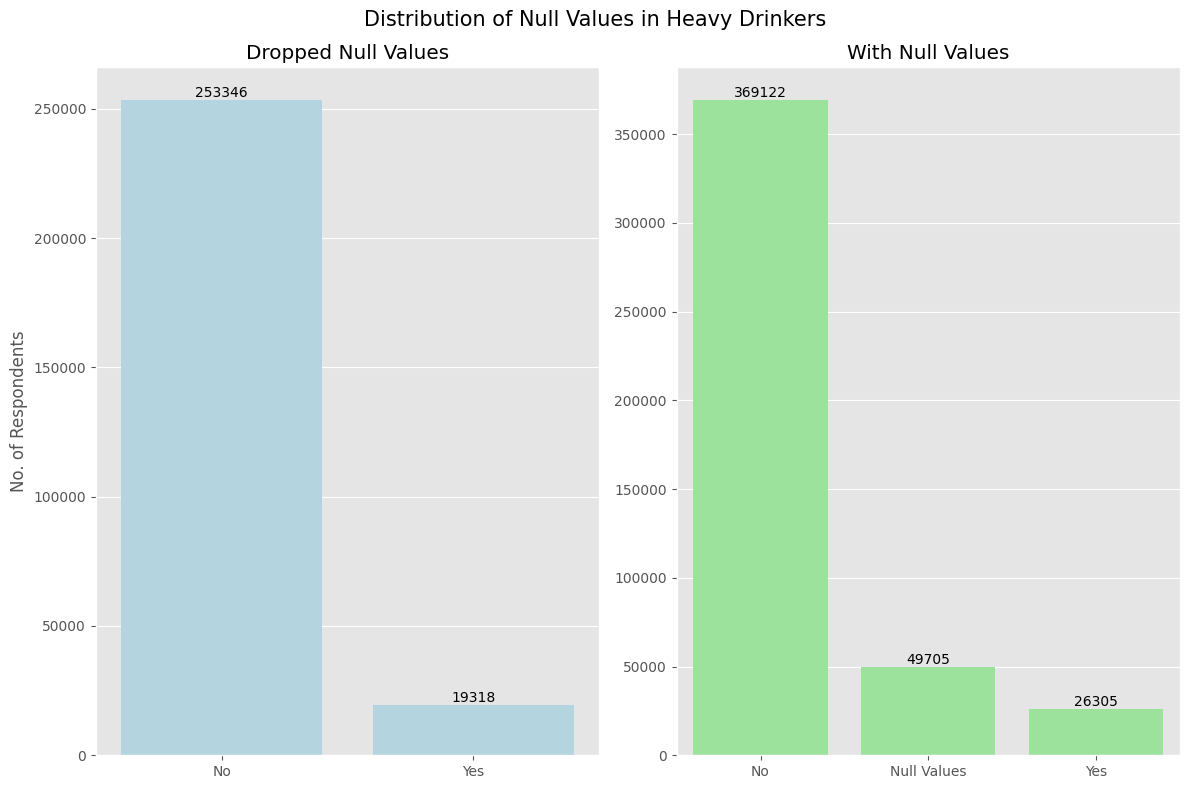

'

In this comparison plot, we can see that the distributions between the 2 plots are largely similar in distributions for 'Yes' and 'No'.





      


In [42]:
# Comparisons of dropping all null values vs keeping null values in Heavy Drinkers

# set figure size
fig, axes = plt.subplots(1,2, figsize=(12,8))

# value counts for dropped null values
heavy_drinker_dropped = heart_df_dropall['heavy_drinker'].value_counts()

# plot dropped null values
heavy_drinker_dropped_plot = sns.barplot(x = heavy_drinker_dropped.index, y = heavy_drinker_dropped.values, color = 'lightblue', ax=axes[0])

# set plot info
axes[0].set_title('Dropped Null Values')
axes[0].set_xlabel('')
axes[0].set_ylabel('No. of Respondents')
axes[0].set_xticks(range(len(heavy_drinker_dropped.index)))
axes[0].set_xticklabels(heavy_drinker_dropped.index)

# Annotate bar values
for bar in heavy_drinker_dropped_plot.patches:
    axes[0].annotate(format(bar.get_height(), '.0f'),
                     (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                     ha='center', va='bottom')

##########################################################################################


# value counts for heavy drinkers WITH null values
heavy_drinkers_null = df_updated['heavy_drinker'].value_counts(dropna=False)

# Rename NaN values to 'Unknown' for visualization
heavy_drinkers_null = heavy_drinkers_null.rename({np.nan: 'Null Values'})

# plot with null values
heavy_drinkers_null_plot = sns.barplot(x = heavy_drinkers_null.index, y = heavy_drinkers_null.values, color = 'lightgreen', ax= axes[1])
axes[1].set_title('With Null Values')
axes[1].set_xlabel('')
axes[1].set_ylabel('')
axes[1].set_xticks(range(len(heavy_drinkers_null.index)))
axes[1].set_xticklabels(heavy_drinkers_null.index)


# Annotate bar values
for bar in heavy_drinkers_null_plot.patches:
    axes[1].annotate(format(bar.get_height(), '.0f'),
                     (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                     ha='center', va='bottom')

plt.suptitle('Distribution of Null Values in Heavy Drinkers', fontsize = 15)
plt.tight_layout()

plt.show()

print(f''''

In this comparison plot, we can see that the distributions between the 2 plots are largely similar in distributions for 'Yes' and 'No'.





      ''')

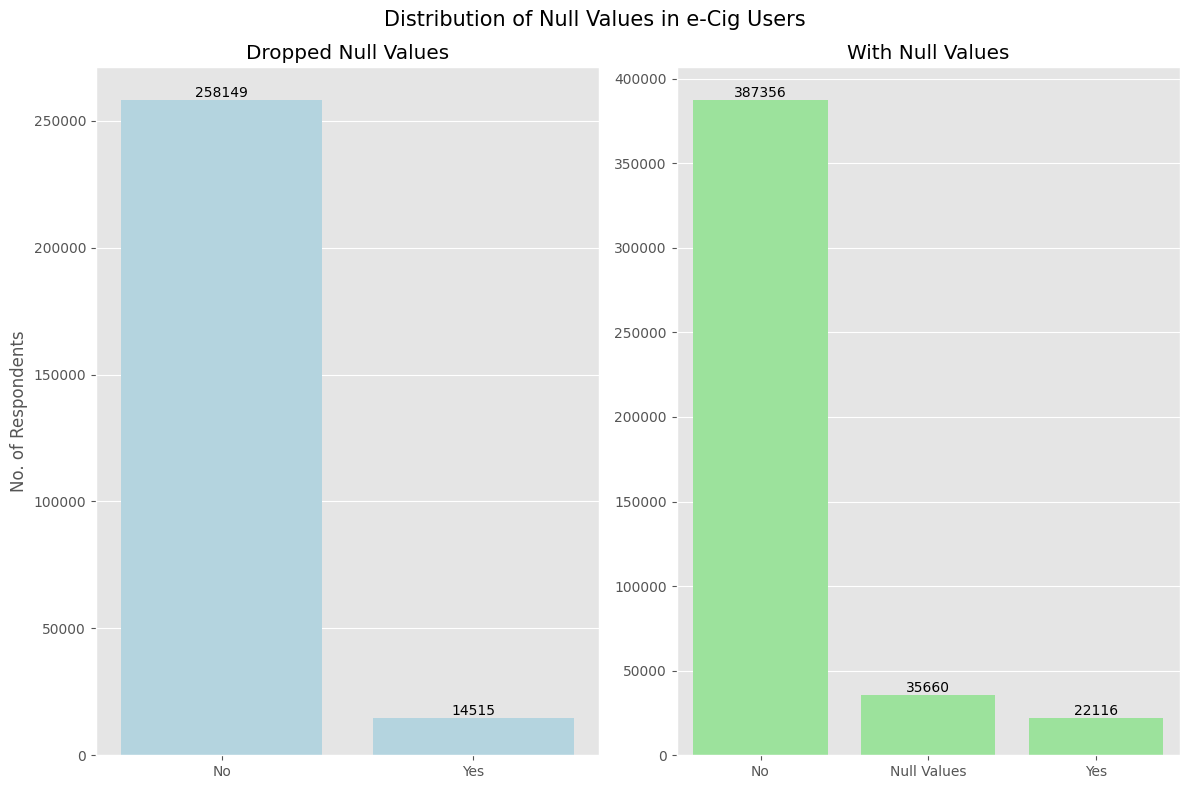

'

In this comparison plot, we can see that the distributions between the 2 plots are largely similar in distributions for 'Yes' and 'No'.





      


In [43]:
# Comparisons of dropping all null values vs keeping null values in e-cig smokers

# set figure size
fig, axes = plt.subplots(1,2, figsize=(12,8))

# value counts for e-cig dropped null values
ecig_users_dropped = heart_df_dropall['e_cig_smoker'].value_counts()

# plot dropped null values
ecig_users_dropped_plot = sns.barplot(x = ecig_users_dropped.index, y = ecig_users_dropped.values, color = 'lightblue', ax=axes[0])

# set plot info
axes[0].set_title('Dropped Null Values')
axes[0].set_xlabel('')
axes[0].set_ylabel('No. of Respondents')
axes[0].set_xticks(range(len(ecig_users_dropped.index)))
axes[0].set_xticklabels(ecig_users_dropped.index)

# Annotate bar values
for bar in ecig_users_dropped_plot.patches:
    axes[0].annotate(format(bar.get_height(), '.0f'),
                     (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                     ha='center', va='bottom')

##########################################################################################


# value counts for e-Cig Users WITH null values
ecig_users_null = df_updated['e_cig_smoker'].value_counts(dropna=False)

# Rename NaN values to 'Unknown' for visualization
ecig_users_null = ecig_users_null.rename({np.nan: 'Null Values'})

# plot with null values
ecig_users_null_plot = sns.barplot(x = ecig_users_null.index, y = ecig_users_null.values, color = 'lightgreen', ax= axes[1])
axes[1].set_title('With Null Values')
axes[1].set_xlabel('')
axes[1].set_ylabel('')
axes[1].set_xticks(range(len(ecig_users_null.index)))
axes[1].set_xticklabels(ecig_users_null.index)


# Annotate bar values
for bar in ecig_users_null_plot.patches:
    axes[1].annotate(format(bar.get_height(), '.0f'),
                     (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                     ha='center', va='bottom')

plt.suptitle('Distribution of Null Values in e-Cig Users', fontsize = 15)
plt.tight_layout()

plt.show()

print(f''''

In this comparison plot, we can see that the distributions between the 2 plots are largely similar in distributions for 'Yes' and 'No'.





      ''')

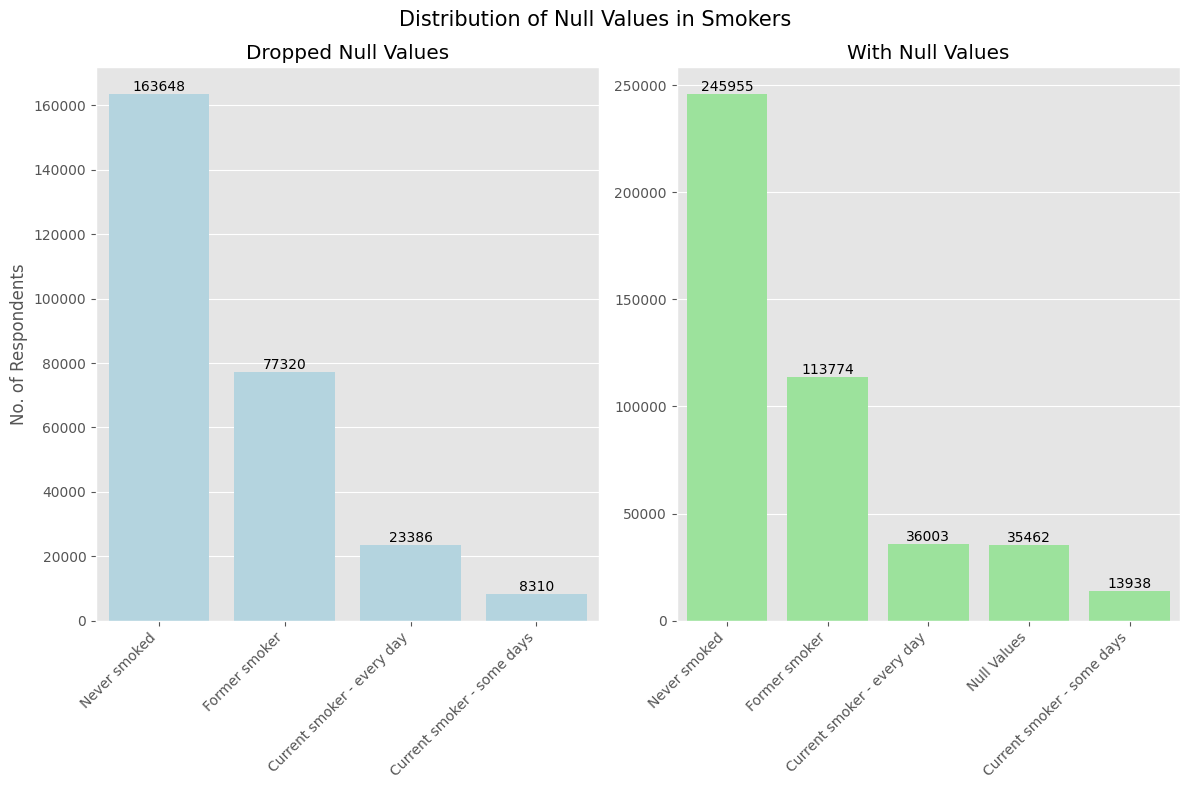

'

In this comparison plot, we can see that the distributions between the 2 plots are largely similar in distributions.
         - The biggest group consistently comprised of more non-smokers
         - The second biggest group are those who had quit smoking
         - The third biggest group are those that are current smokers who are smoking everyday
         - The last group are smokers who smokes every other day

      


In [44]:
# Comparisons of dropping all null values vs keeping null values in smoker status

# set figure size
fig, axes = plt.subplots(1,2, figsize=(12,8))

# value counts for smoker status dropped null values
smoker_status_dropped = heart_df_dropall['smoker_status'].value_counts()

# plot dropped null values
smoker_status_dropped_plot = sns.barplot(x = smoker_status_dropped.index, y = smoker_status_dropped.values, color = 'lightblue', ax=axes[0])

# set plot info
axes[0].set_title('Dropped Null Values')
axes[0].set_xlabel('')
axes[0].set_ylabel('No. of Respondents')
axes[0].set_xticks(range(len(smoker_status_dropped.index)))
axes[0].set_xticklabels(smoker_status_dropped.index, rotation = 45, ha = 'right')

# Annotate bar values
for bar in smoker_status_dropped_plot.patches:
    axes[0].annotate(format(bar.get_height(), '.0f'),
                     (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                     ha='center', va='bottom')

##########################################################################################


# value counts for e-Cig Users WITH null values
smoker_status_null = df_updated['smoker_status'].value_counts(dropna=False)

# Rename NaN values to 'Unknown' for visualization
smoker_status_null = smoker_status_null.rename({np.nan: 'Null Values'})

# plot with null values
smoker_status_null_plot = sns.barplot(x = smoker_status_null.index, y = smoker_status_null.values, color = 'lightgreen', ax= axes[1])
axes[1].set_title('With Null Values')
axes[1].set_xlabel('')
axes[1].set_ylabel('')
axes[1].set_xticks(range(len(smoker_status_null.index)))
axes[1].set_xticklabels(smoker_status_null.index, rotation = 45, ha = 'right')


# Annotate bar values
for bar in smoker_status_null_plot.patches:
    axes[1].annotate(format(bar.get_height(), '.0f'),
                     (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                     ha='center', va='bottom')

plt.suptitle('Distribution of Null Values in Smokers', fontsize = 15)
plt.tight_layout()

plt.show()

print(f''''

In this comparison plot, we can see that the distributions between the 2 plots are largely similar in distributions.
         - The biggest group consistently comprised of more non-smokers
         - The second biggest group are those who had quit smoking
         - The third biggest group are those that are current smokers who are smoking everyday
         - The last group are smokers who smokes every other day

      ''')

### 2A.8 Key Takeaway

Generally, a large proportion of the respondents are healthy, in a sense, not indulging on alcoholic beverages or smoking. Morever, the last routine check up and dentist visitations are relatively recent - in the past 2 years.

We note that the average and median BMI range (27 -29) of the respondents were considered high, which we can infer that most of them are overweight. This survey has more respondents in the greater age range with the most responents from 80 years old. Understanding that this is a phone survey, most senior respondents are most likely to be home as compared to working adults and adults who are still pursuing their education.

In the next notebook [2B. Exploratory Data Analysis - Analysis on Missing Values](02B_EDA_MissingValues.ipynb), we will do an analysis of the missing values and impute them accordingly.